# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
import numpy as np
from pathlib import Path
from datetime import datetime
import seaborn.objects as so
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [2]:
cuestionario = pd.read_excel("EGD-Cuestionario.xlsx", engine='openpyxl')
cuestionario.columns = cuestionario.iloc[0]
cuestionario = cuestionario.iloc[1:]

# Plots

## Análisis Etapa 1

### Pregunta P2.GC.1

In [59]:
CantPersonas = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.GC.1"]]
bin = [0,50,100,150,200,300,500,800,1000,3000,10000,50000,57000]
numerico = pd.to_numeric(CantPersonas['P2.GC.1'], errors='coerce').notna()
CantPersonas = CantPersonas.loc[numerico]
CantPersonas['P2.GC.1'].dropna(inplace=True)
CantPersonas["P2.GC.1"] = CantPersonas["P2.GC.1"].astype(int)
bins = pd.cut(CantPersonas['P2.GC.1'], bins=bin, include_lowest=True)
CantPersonas['intervalos'] = bins

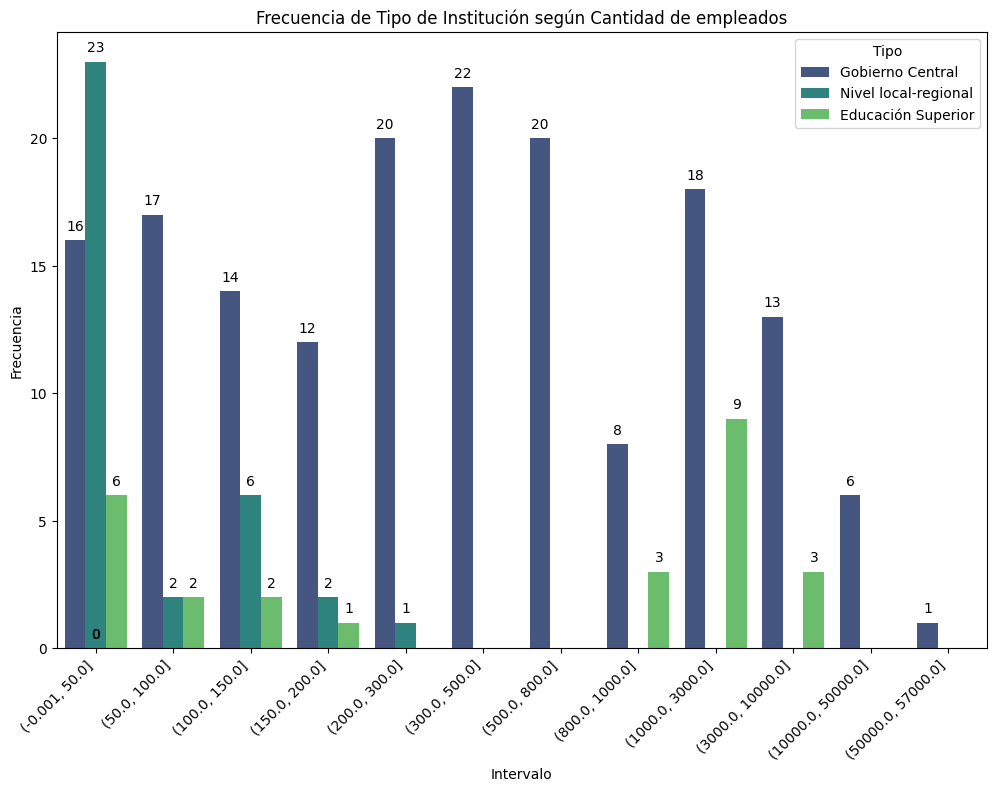

In [60]:
CantPersonas['intervalos'] = pd.Categorical(CantPersonas['intervalos'], ordered=True, categories=CantPersonas['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de Institución según Cantidad de empleados')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_19600\471746787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')


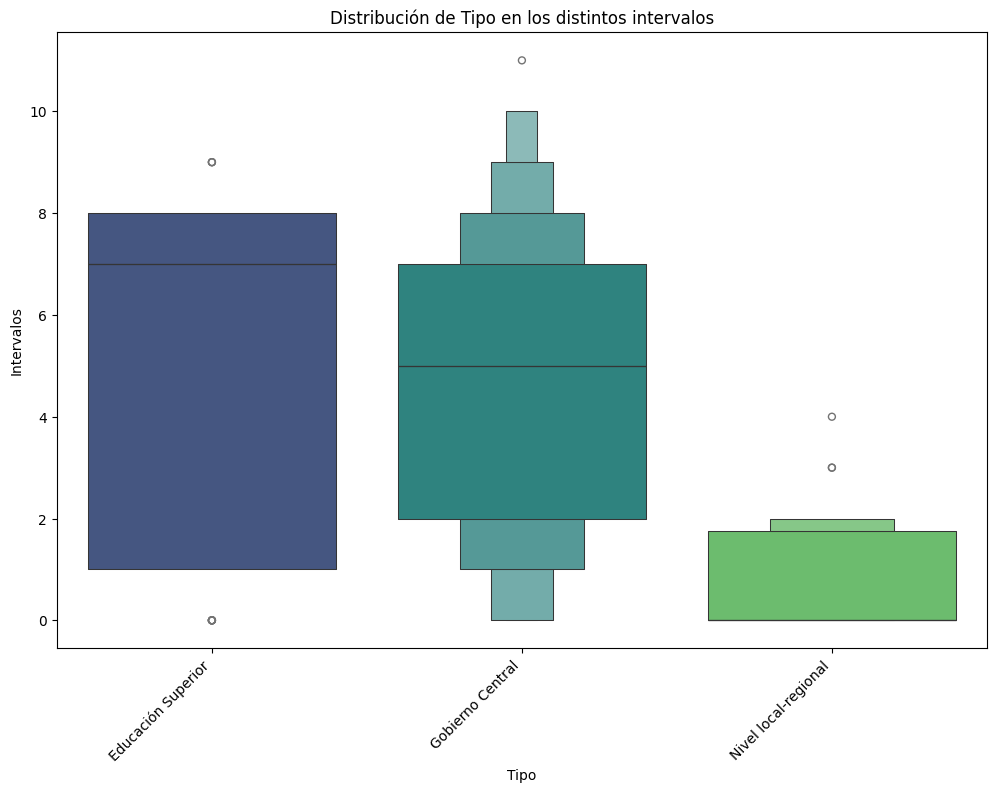

In [61]:
CantPersonas['intervalos'] = CantPersonas['intervalos'].cat.codes
CantPersonas['Tipo'] = CantPersonas['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(x='Tipo', y='intervalos', data=CantPersonas,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


### Pregunta P2.M.1

In [62]:
CantPersonasAdm = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.1"]]

CantPersonasCorp = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.M.1.2"]]

In [63]:
#Administracion municipal
binAdm = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 5000]
numerico = pd.to_numeric(CantPersonasAdm['P2.M.1.1'], errors='coerce').notna()
CantPersonasAdm = CantPersonasAdm.loc[numerico]
CantPersonasAdm['P2.M.1.1'].dropna(inplace=True)
CantPersonasAdm["P2.M.1.1"] = CantPersonasAdm["P2.M.1.1"].astype(int)
bins = pd.cut(CantPersonasAdm["P2.M.1.1"], bins=binAdm, include_lowest=True)
CantPersonasAdm['intervalos'] = bins

#Corp o fund municipales

binCorp = [0, 50, 100, 200, 400, 800, 1200, 1800, 2200, 3000, 4000, 6000]
numerico = pd.to_numeric(CantPersonasCorp['P2.M.1.2'], errors='coerce').notna()
CantPersonasCorp = CantPersonasCorp.loc[numerico]
CantPersonasCorp['P2.M.1.2'].dropna(inplace=True)
CantPersonasCorp["P2.M.1.2"] = CantPersonasCorp["P2.M.1.2"].astype(int)
bins = pd.cut(CantPersonasCorp["P2.M.1.2"], bins=binCorp, include_lowest=True)
CantPersonasCorp['intervalos'] = bins

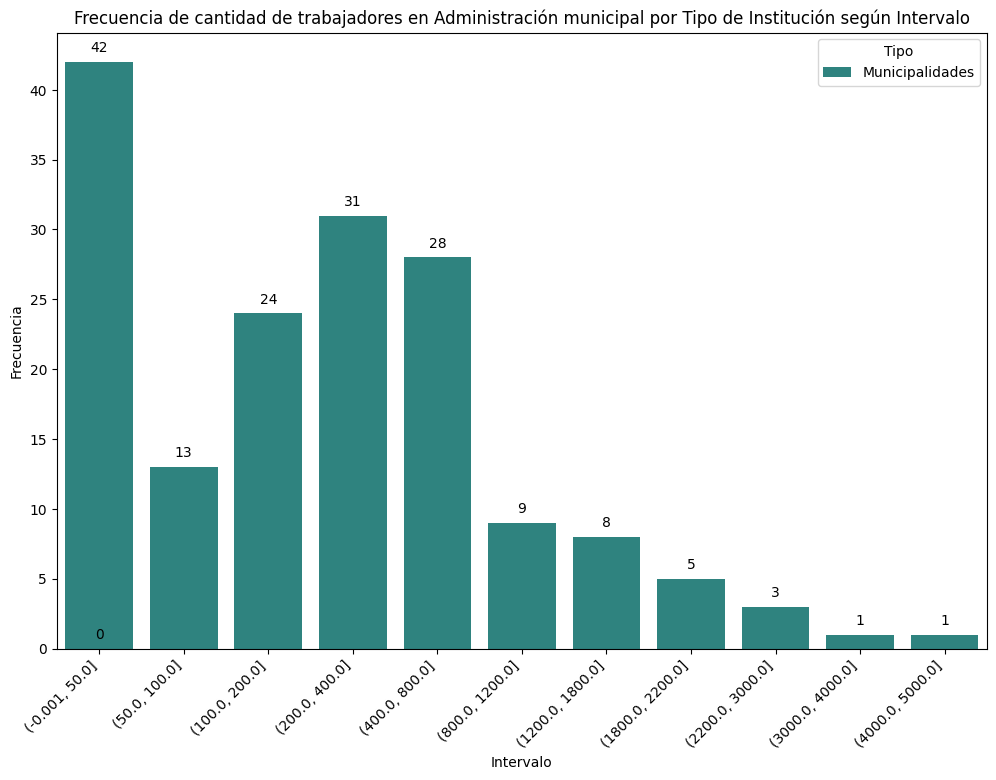

In [64]:
CantPersonasAdm['intervalos'] = pd.Categorical(CantPersonasAdm['intervalos'], ordered=True, categories=CantPersonasAdm['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasAdm, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Administración municipal por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

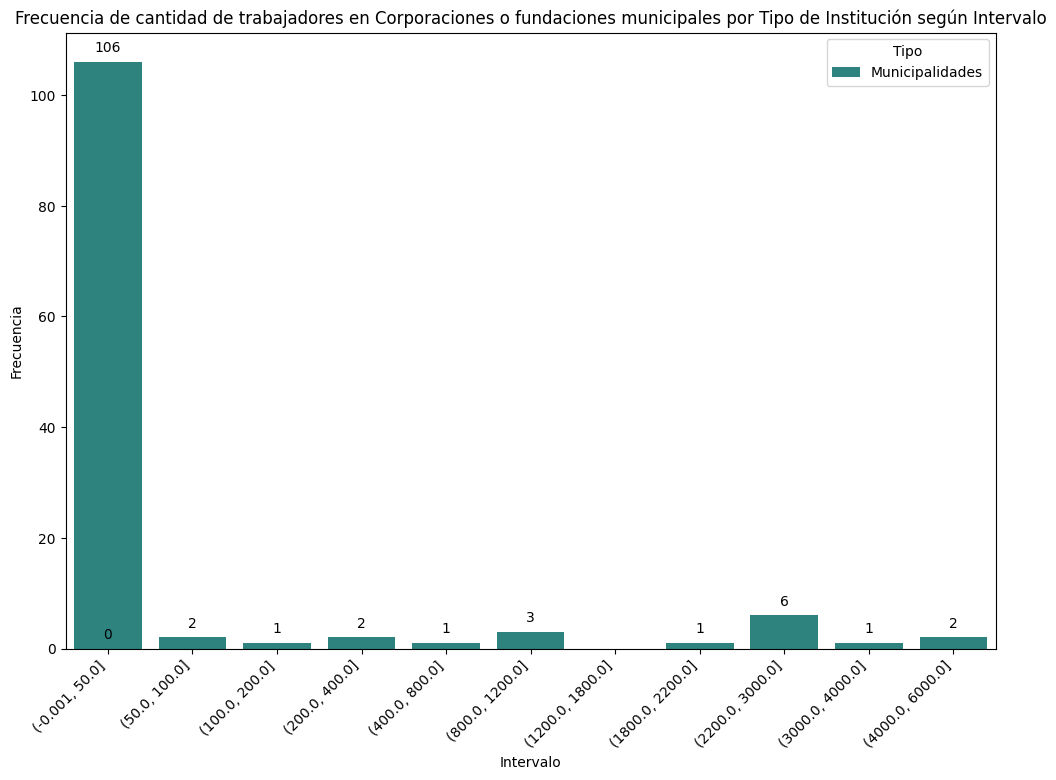

In [65]:
CantPersonasCorp['intervalos'] = pd.Categorical(CantPersonasCorp['intervalos'], ordered=True, categories=CantPersonasCorp['intervalos'].unique())

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CantPersonasCorp, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cantidad de trabajadores en Corporaciones o fundaciones municipales por Tipo de Institución según Intervalo')

for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

### Pregunta P2.5

In [66]:
funciones = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.5.1","P2.5.2","P2.5.3","P2.5.4","P2.5.5","P2.5.6","P2.5.7","P2.5.8"]]

In [67]:
funciones = funciones.replace("#s.i.",0)
funciones = funciones.replace("#n.s.",0)
funciones = funciones.replace("#n.a.",0)

In [68]:
def convertir_a_1(valor):
    return 1 if valor != 0 else 0

In [69]:
columnas_p2_5 = funciones.columns[funciones.columns.str.startswith("P2.5")]
funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_19600\3883449651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  funciones[columnas_p2_5] = funciones[columnas_p2_5].applymap(convertir_a_1)


In [70]:
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]
columnas_frecuencia = ['Tipo','P2.5.1', 'P2.5.2', 'P2.5.3', 'P2.5.4', 'P2.5.5', 'P2.5.6', 'P2.5.7', 'P2.5.8']
df_frecuencia = funciones[columnas_frecuencia]

df_melted = pd.melt(df_frecuencia, id_vars=['Tipo'], var_name='Columna', value_name='Frecuencia')

df_melted = df_melted[df_melted['Frecuencia'] == 1]

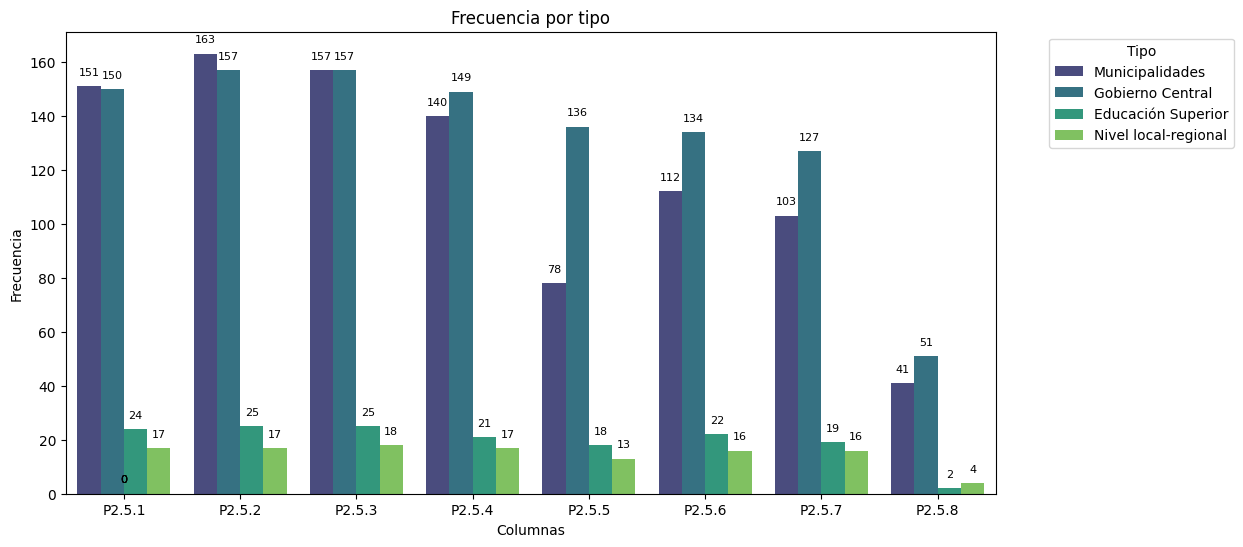

In [71]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Columna', hue='Tipo', data=df_melted, palette='viridis')

plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por tipo')

for p in ax.patches:
    ax.annotate((f'{round(p.get_height())}'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)


plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Pregunta P2.6b

In [72]:
PersInfor = cuestionario[["Tipo","P1.1.1","P2.6b.1","P2.6b.2"]]
PersInfor = PersInfor.replace({'#s.i.': 0, '#n.a.': 0})

PersInfor['P2.6b.1'] = pd.to_numeric(PersInfor['P2.6b.1'], errors="coerce")
PersInfor['P2.6b.2'] = pd.to_numeric(PersInfor['P2.6b.2'], errors="coerce")
PersInfor['P2.6b.1'] = PersInfor['P2.6b.1'].astype(float)
PersInfor['P2.6b.2'] = PersInfor['P2.6b.2'].astype(float)
pivot_table = PersInfor.pivot_table(index='Tipo', values=['P2.6b.1', 'P2.6b.2'], aggfunc='sum')

df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
df_percentage = df_percentage.dropna()

df_percentage['P2.6b.1'] = pd.to_numeric(df_percentage['P2.6b.1'])
df_percentage['P2.6b.2'] = pd.to_numeric(df_percentage['P2.6b.2'])

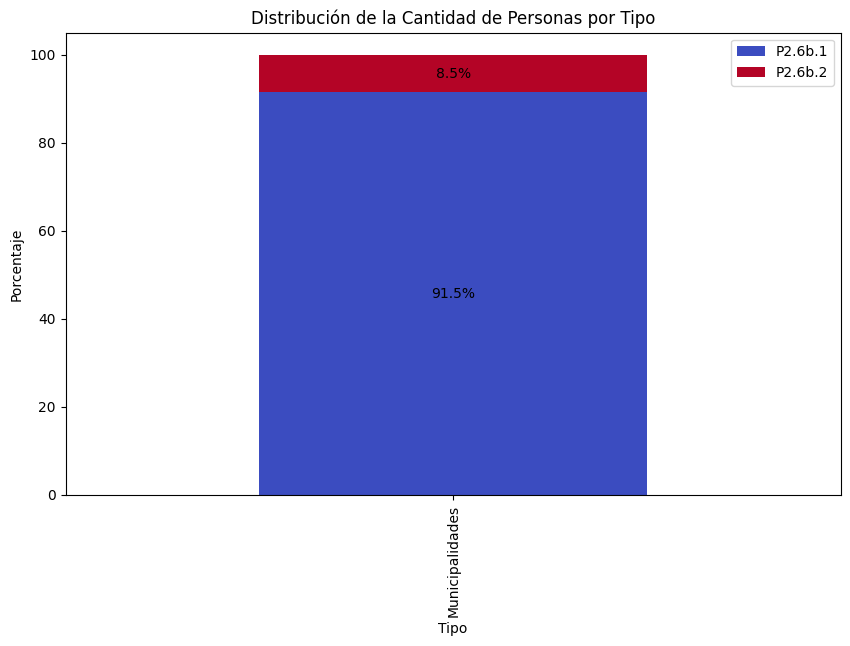

In [73]:
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(['P2.6b.1', 'P2.6b.2'], loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

### Pregunta P2.7

In [74]:
PropEquipos = cuestionario[["Tipo","P2.GC.1","P2.M.1.1","P2.M.1.2","P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"]]
PropEquipos = PropEquipos.replace({'#s.i.': 0, '#n.a.': 0})

In [75]:
PropEquipos["PersonalInstitución"] = PropEquipos["P2.GC.1"] + PropEquipos["P2.M.1.1"] + PropEquipos["P2.M.1.2"]
PropEquipos["PersonalTIC"] = PropEquipos["P2.7.1"] + PropEquipos["P2.7.2"] + PropEquipos["P2.7.3"] + PropEquipos["P2.7.4"] + PropEquipos["P2.7.5"] + PropEquipos["P2.7.6"]
PropEquipos["ProporcionTIC"] = PropEquipos["PersonalTIC"] * 100 / PropEquipos["PersonalInstitución"]

In [76]:
PropTIC = PropEquipos[["Tipo","ProporcionTIC"]]
PropTIC = PropTIC.replace({np.inf: np.nan})
PropTIC = PropTIC.dropna()
bin = [0,10,20,30,40,50,60,70,80,90,100]
bins = pd.cut(PropTIC['ProporcionTIC'], bins=bin, include_lowest=True)
PropTIC['intervalos'] = bins

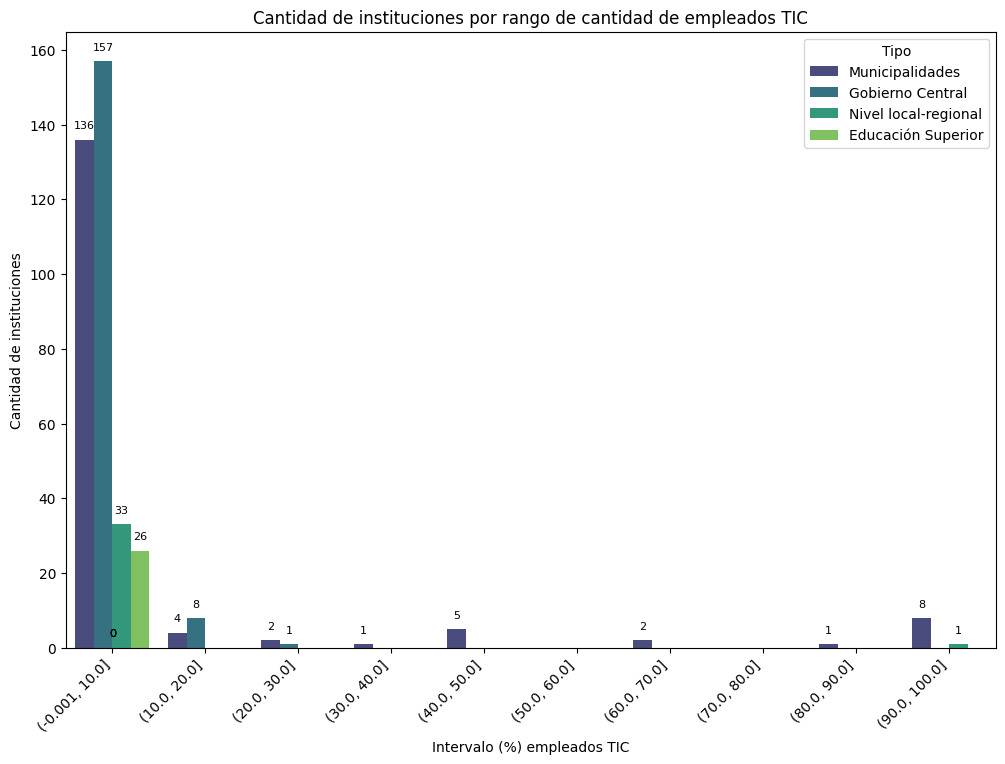

In [77]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PropTIC, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo (%) empleados TIC')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de cantidad de empleados TIC')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [78]:
pivot_table = PropEquipos.pivot_table(index='Tipo', values=["P2.7.1","P2.7.2","P2.7.3","P2.7.4","P2.7.5","P2.7.6"], aggfunc='sum')

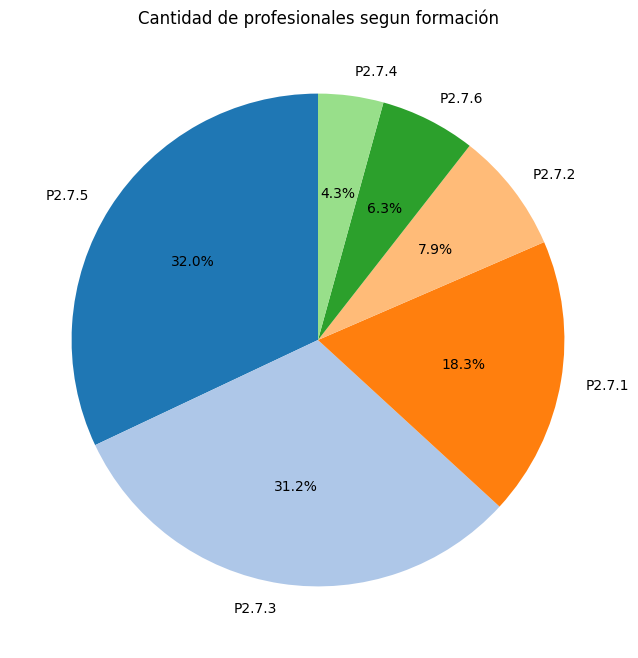

In [79]:
df_sum = pivot_table.sum()
df_sum = df_sum.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Cantidad de profesionales segun formación')
plt.show()

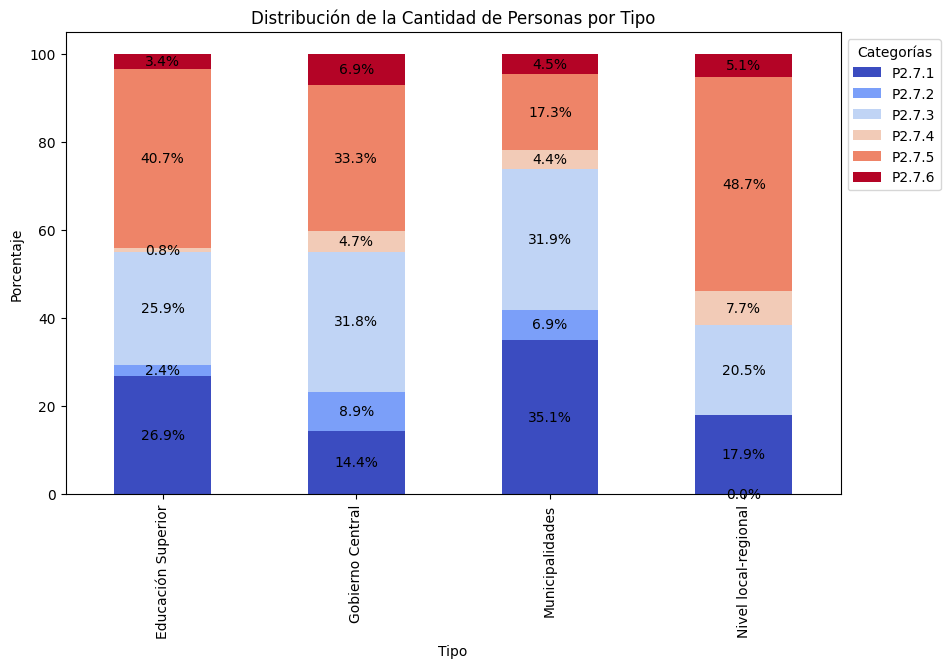

In [80]:
df_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribución de la Cantidad de Personas por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje')
plt.legend(title='Categorías', bbox_to_anchor=(1, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

### Pregunta 2.8

In [81]:
ProfPorPerfil = cuestionario[["Tipo","P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]]
ProfPorPerfil = ProfPorPerfil.replace({'#s.i.': 0, '#n.a.': 0})
ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]] = ProfPorPerfil[["P2.8.1.3","P2.8.2.3","P2.8.3.3","P2.8.4.3","P2.8.5.3","P2.8.6.3","P2.8.7.3","P2.8.8.3","P2.8.9.3","P2.8.10.3","P2.8.11.3","P2.8.12.3","P2.8.13.3","P2.8.14.3","P2.8.15.3","P2.8.16.3","P2.8.17.3"]].astype(int)

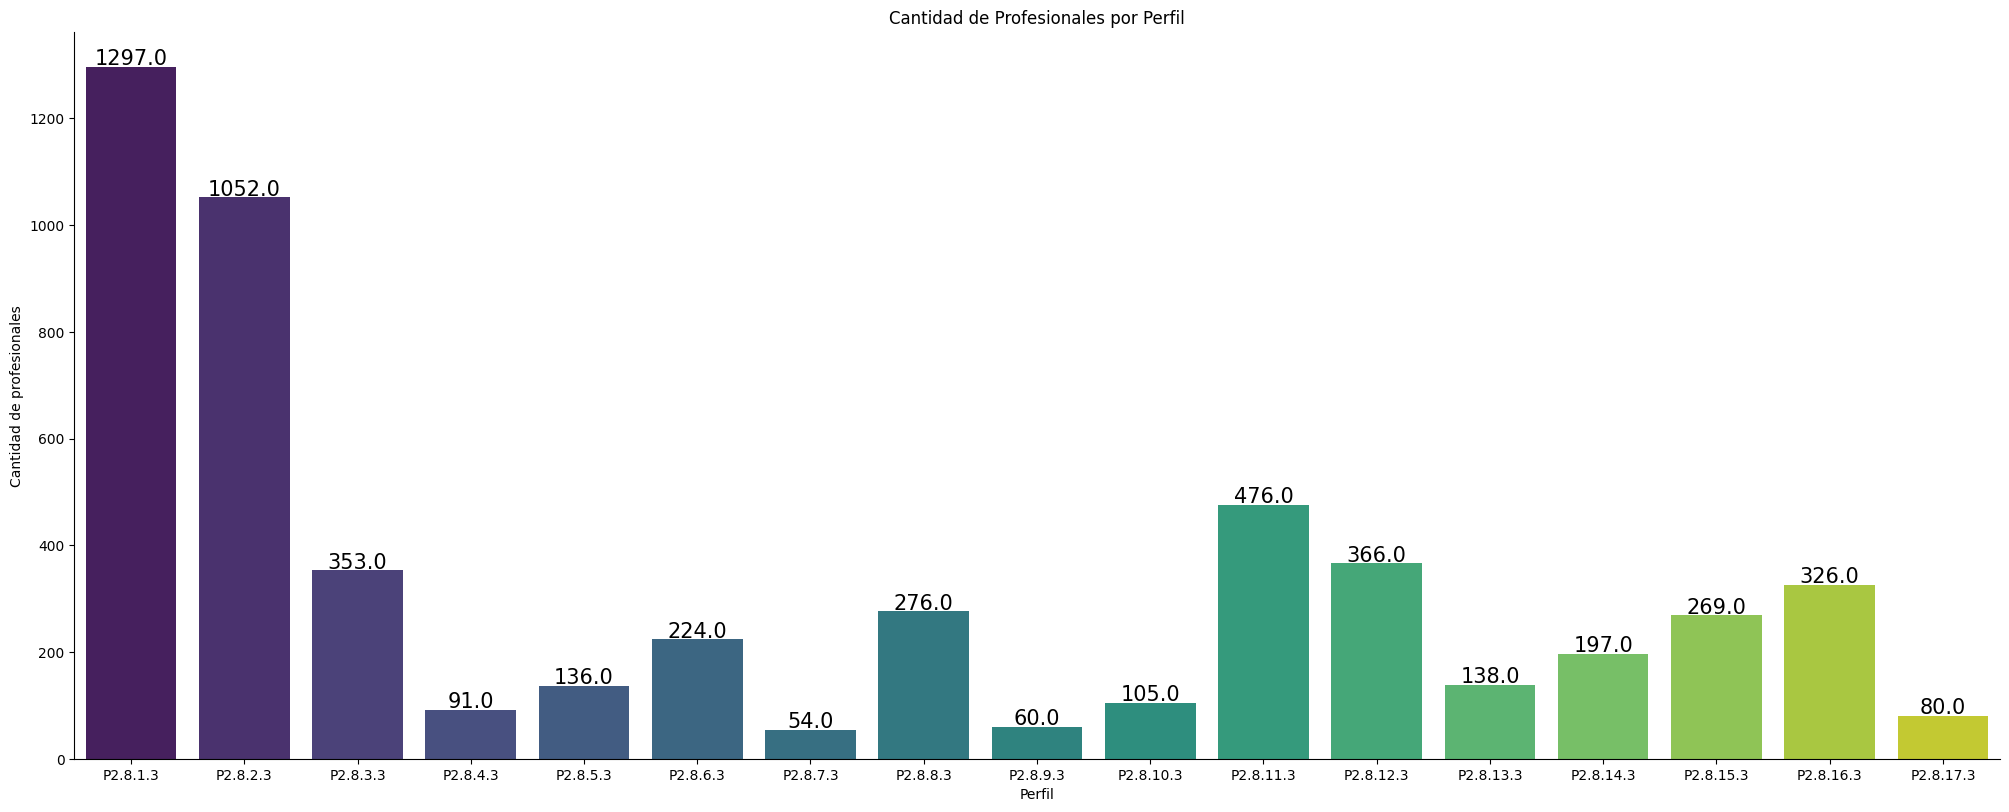

In [82]:
g = sns.catplot(data=ProfPorPerfil, kind="bar", height=8, aspect=2.5, palette='viridis',estimator="sum",errorbar=None)

plt.title('Cantidad de Profesionales por Perfil')
plt.xlabel('Perfil')
plt.ylabel('Cantidad de profesionales')

for ax in g.axes.flat:
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width / 2, y + height + 15), ha='center', va='center',fontsize=15)

plt.show()

In [83]:
df_melted = pd.melt(ProfPorPerfil, id_vars=['Tipo'], var_name='Columna', value_name='Cantidad')

df_sum = df_melted.groupby(['Tipo', 'Columna'])['Cantidad'].sum().reset_index()

df_sum['Porcentaje'] = df_sum.groupby('Columna')['Cantidad'].transform(lambda x: x / x.sum() * 100)

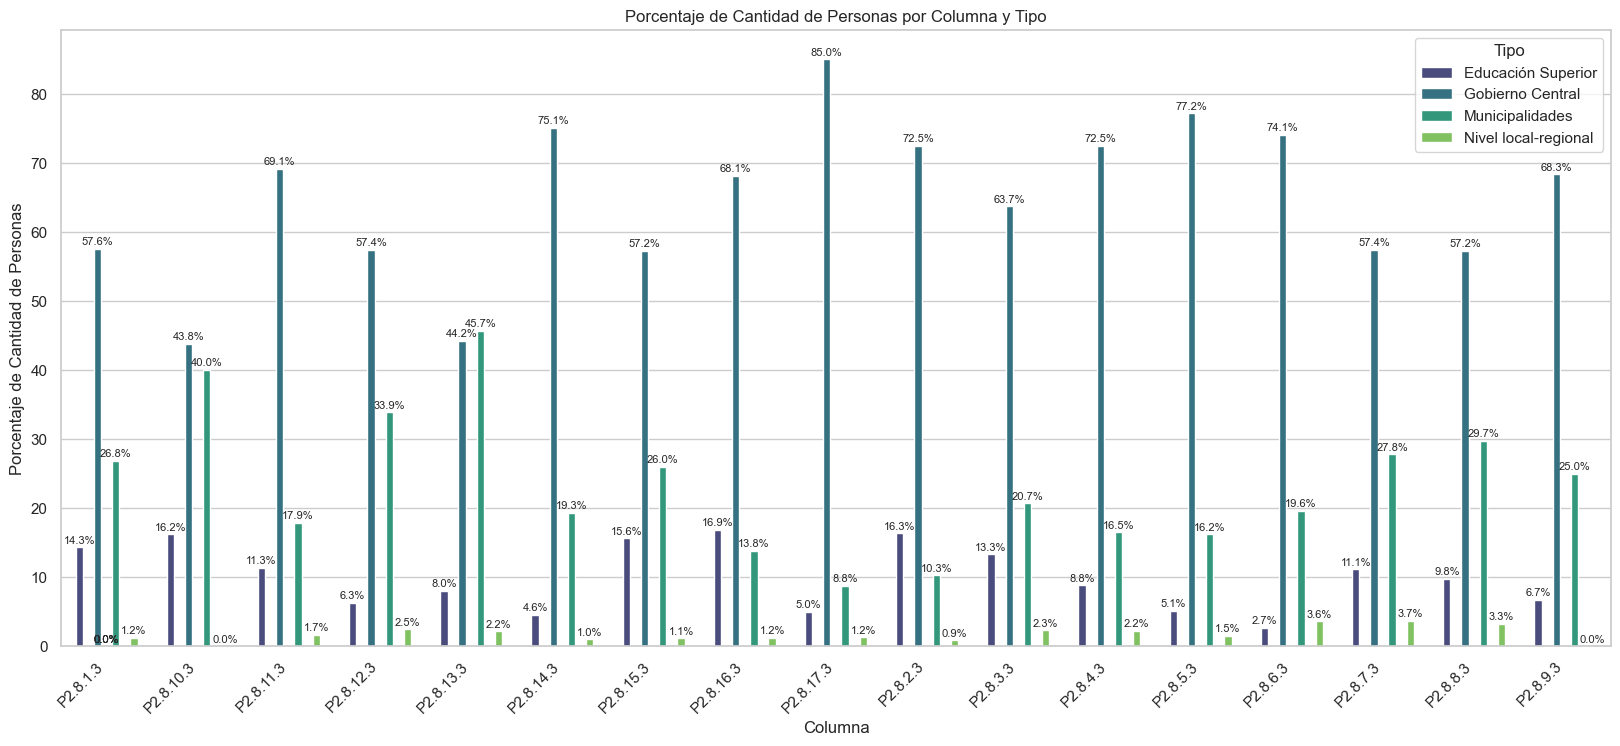

In [84]:

plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='Columna', y='Porcentaje', hue='Tipo', data=df_sum, palette='viridis', dodge=True, gap=0.6,width=0.8)

plt.subplots_adjust(hspace=0.125, wspace=0.125)
plt.title('Porcentaje de Cantidad de Personas por Columna y Tipo')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Cantidad de Personas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo', loc='upper right')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height + 1), ha='center', va='center', fontsize=8)

plt.show()


### P4.3

In [85]:
FirmAutorizados = cuestionario[["Tipo","P4.3"]]
FirmAutorizados = FirmAutorizados.replace({'#s.i.': 0, '#n.a.': 0})
FirmAutorizados["P4.3"] = FirmAutorizados["P4.3"].astype(int)

In [86]:
bin = [0, 50, 200, 400, 700, 1200, 3000, 5000, 10000, 30000]
bins = pd.cut(FirmAutorizados['P4.3'], bins=bin, include_lowest=True)
FirmAutorizados['intervalos'] = bins

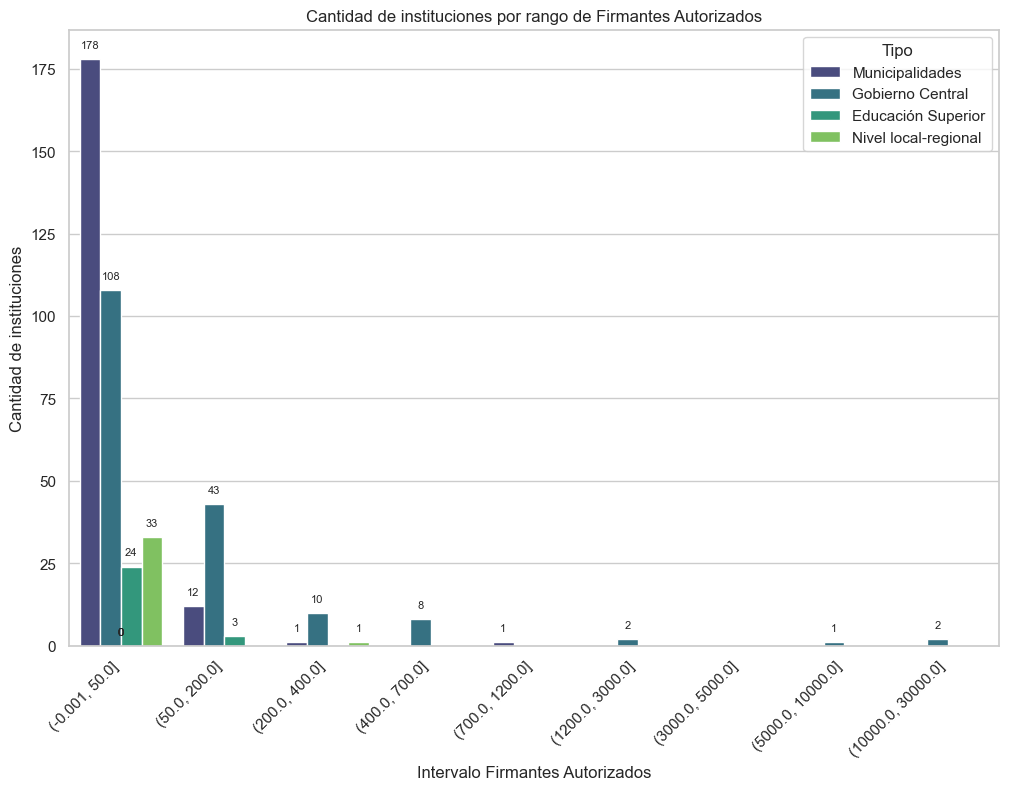

In [87]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=FirmAutorizados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Firmantes Autorizados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Firmantes Autorizados')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P4.4

In [88]:
DocsFirmados = cuestionario[["Tipo","P4.4"]]
DocsFirmados = DocsFirmados.replace({'#s.i.': 0, '#n.a.': 0})
DocsFirmados["P4.4"] = DocsFirmados["P4.4"].astype(int)
bin = [0, 500, 2000, 5000, 8000, 12000, 20000, 50000, 100000, 150000,300000,700000,1200000,2000000]
bins = pd.cut(DocsFirmados['P4.4'], bins=bin, include_lowest=True)
DocsFirmados['intervalos'] = bins


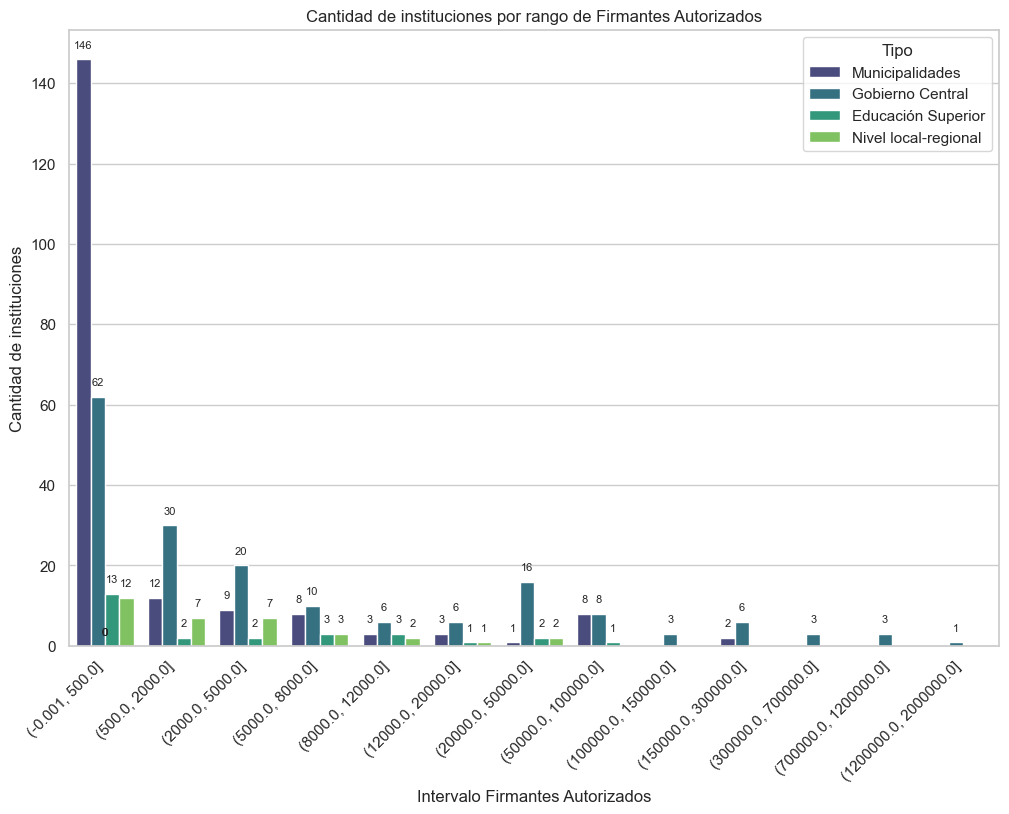

In [89]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocsFirmados, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos firmados electronicamente')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Documentos firmados electronicamente')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.1

In [90]:
OficPartes = cuestionario[["Tipo","P5.1"]]
OficPartes = OficPartes.replace({'#s.i.': 0, '#n.a.': 0})
OficPartes["P5.1"] = OficPartes["P5.1"].astype(float)

In [91]:
OficPartes = OficPartes.loc[OficPartes['P5.1'] <= 1000]

In [92]:
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(OficPartes['P5.1'], bins=bin)
OficPartes['intervalos'] = bins

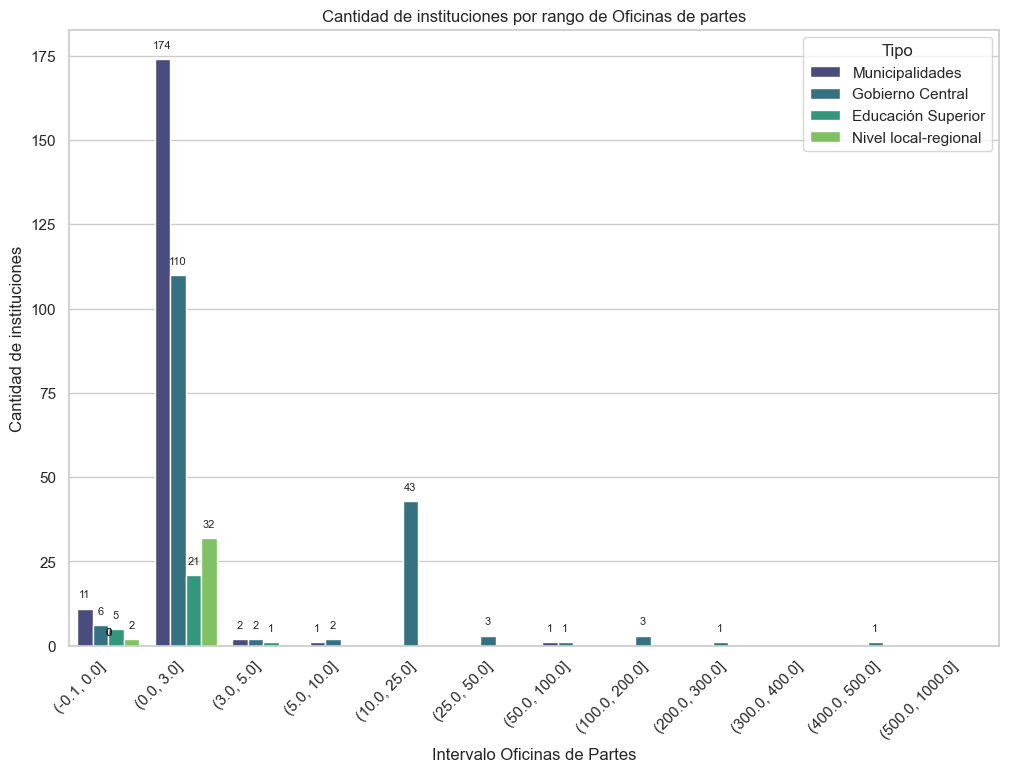

In [93]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=OficPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

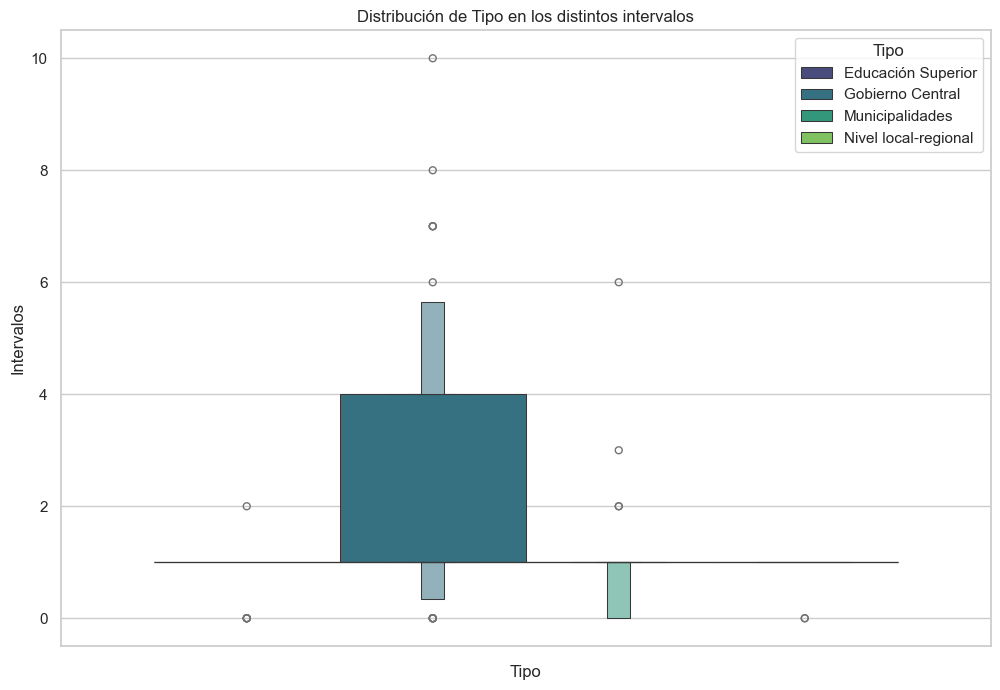

In [94]:
OficPartes['intervalos'] = OficPartes['intervalos'].cat.codes
OficPartes['Tipo'] = OficPartes['Tipo'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxenplot(hue='Tipo', y='intervalos', data=OficPartes,palette='viridis')

plt.xlabel('Tipo')
plt.ylabel('Intervalos')
plt.title('Distribución de Tipo en los distintos intervalos')

plt.xticks(rotation=45, ha='right')

plt.show()


### P5.2

In [95]:
PersOfiPartes = cuestionario[["Tipo","P5.2"]]
PersOfiPartes = PersOfiPartes.replace({'#s.i.': 0, '#n.a.': 0})
PersOfiPartes["P5.2"] = PersOfiPartes["P5.2"].astype(int)
PersOfiPartes = PersOfiPartes.loc[PersOfiPartes['P5.2'] <= 1000]
bin = [-0.1,0,3, 5, 10, 25, 50, 100, 200, 300, 400, 500, 1000]
bins = pd.cut(PersOfiPartes['P5.2'], bins=bin)
PersOfiPartes['intervalos'] = bins

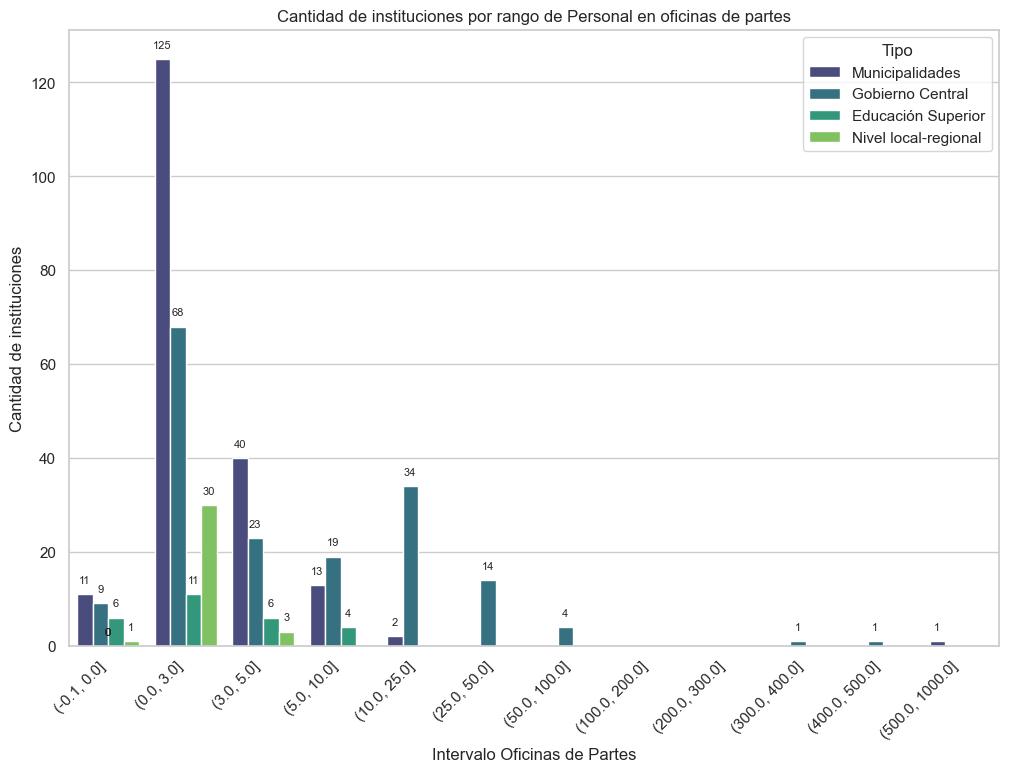

In [96]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=PersOfiPartes, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Oficinas de Partes')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Personal en oficinas de partes')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [97]:
pivot_table = PersOfiPartes.pivot_table(index='Tipo', values=["P5.2"], aggfunc='sum')
df = pivot_table.sort_values(by='P5.2', ascending=False)['P5.2']

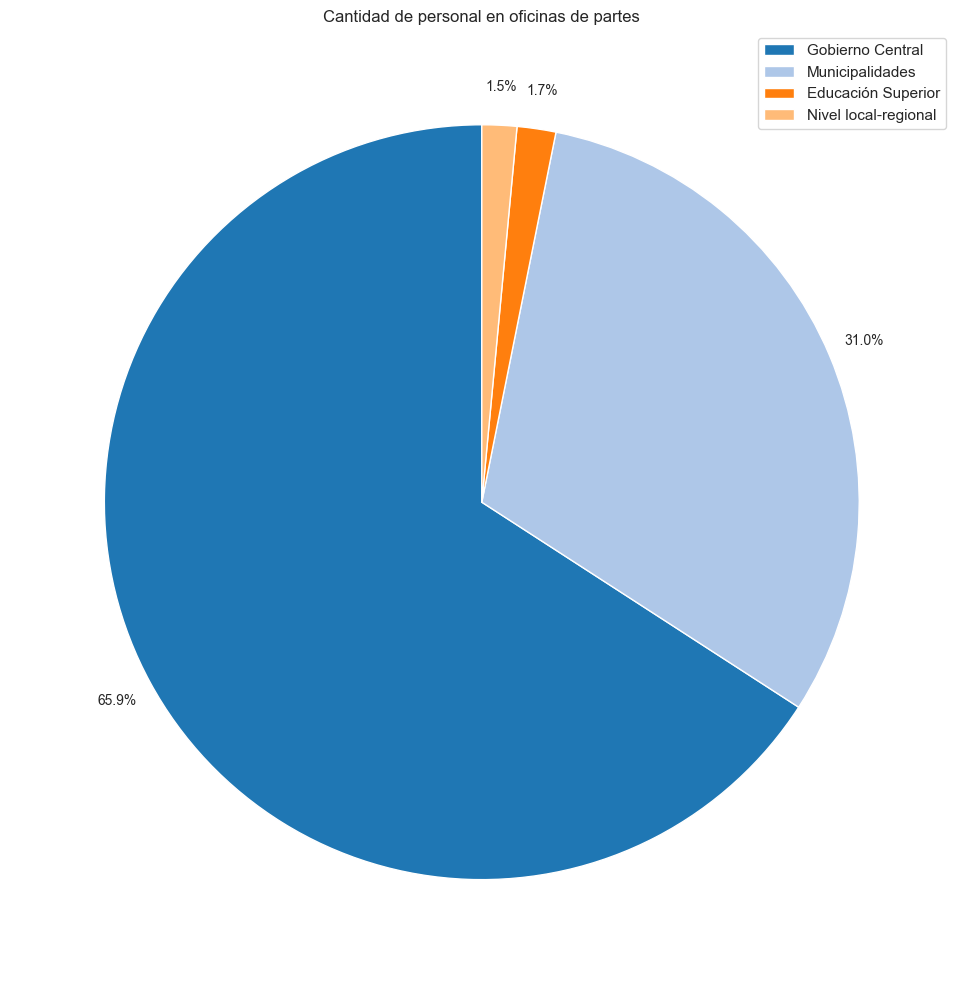

In [98]:
plt.figure(figsize=(10, 10))
plt.pie(df, labels=None, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors,pctdistance=1.1,textprops={'fontsize': 10})
plt.legend(df.index, loc='upper right')
plt.title('Cantidad de personal en oficinas de partes')
plt.tight_layout()
plt.show()

### P5.3

In [99]:
DocOtrasInst = cuestionario[["Tipo","P5.3"]]
DocOtrasInst = DocOtrasInst.replace({'#s.i.': 0, '#n.a.': 0})
DocOtrasInst["P5.3"] = DocOtrasInst["P5.3"].astype(int)

In [100]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000, 2000000]
bins = pd.cut(DocOtrasInst['P5.3'], bins=bin)
DocOtrasInst['intervalos'] = bins

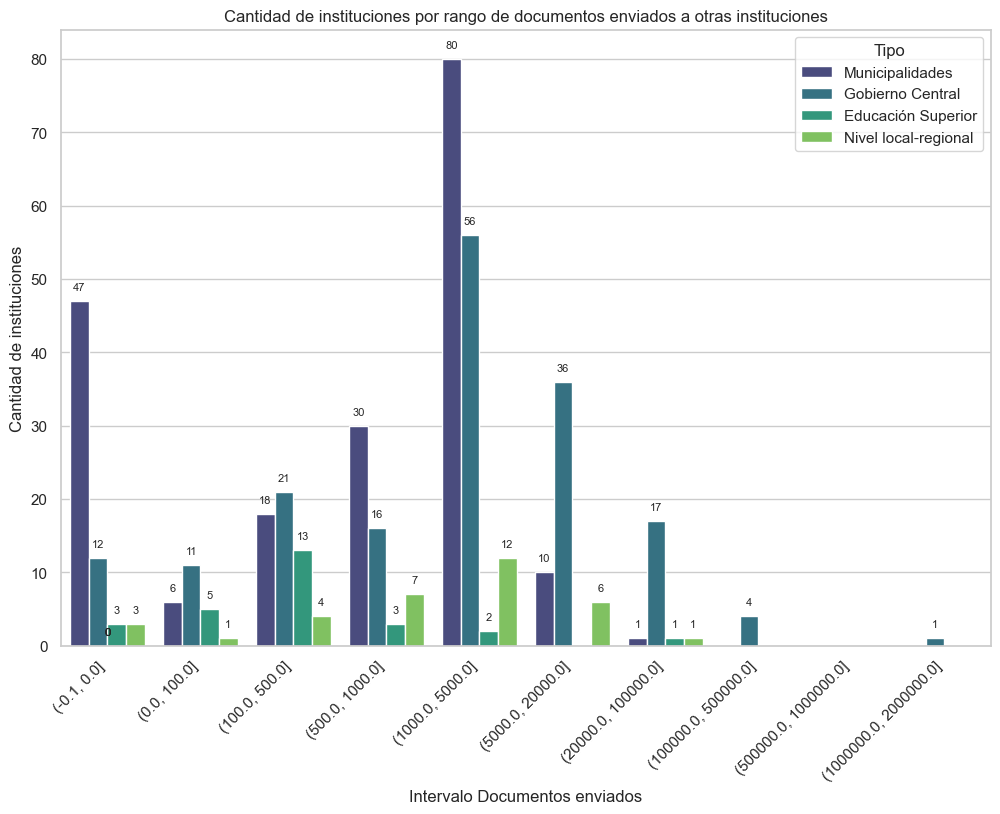

In [101]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocOtrasInst, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos enviados')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos enviados a otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.4

In [102]:
DocRecibidos = cuestionario[["Tipo","P5.4"]]
DocRecibidos = DocRecibidos.replace({'#s.i.': 0, '#n.a.': 0})
DocRecibidos["P5.4"] = DocRecibidos["P5.4"].astype(int)

In [103]:
bin = [-0.1,0,100, 500, 1000, 5000, 20000, 100000, 500000, 1000000]
bins = pd.cut(DocRecibidos['P5.4'], bins=bin)
DocRecibidos['intervalos'] = bins

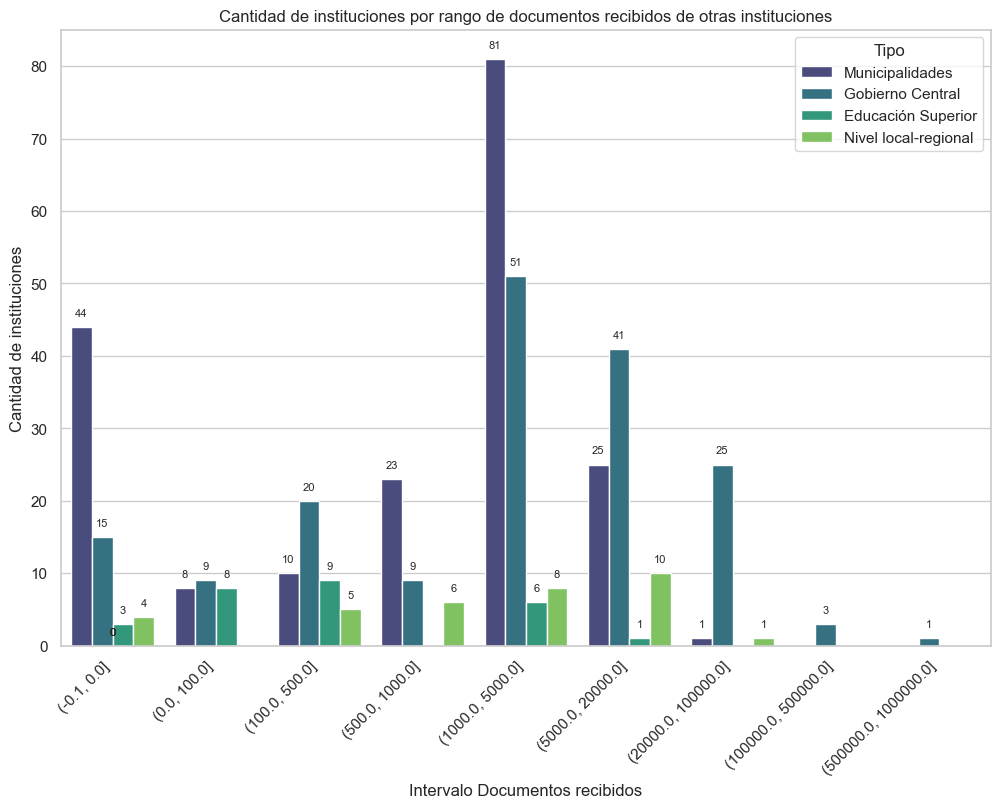

In [104]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=DocRecibidos, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Documentos recibidos')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de documentos recibidos de otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P5.7

In [105]:
ActPolitDocumental = cuestionario[["Tipo","P5.7"]]
ActPolitDocumental = ActPolitDocumental.replace({'#s.i.': np.nan, '#n.a.': np.nan})
ActPolitDocumental = ActPolitDocumental.dropna()
ActPolitDocumental["P5.7"] = ActPolitDocumental["P5.7"].astype(int)

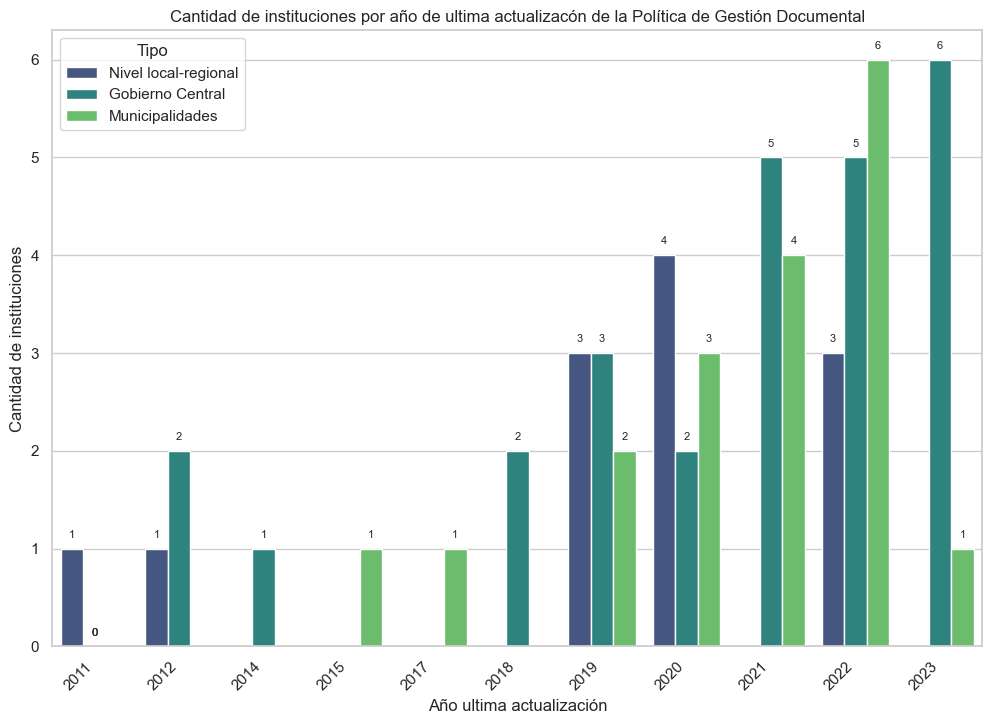

In [106]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='P5.7', hue='Tipo', data=ActPolitDocumental, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Año ultima actualización')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por año de ultima actualizacón de la Política de Gestión Documental')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P6.1

In [107]:
CartCertificadas = cuestionario[["Tipo","P6.1"]]
CartCertificadas = CartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CartCertificadas["P6.1"] = CartCertificadas["P6.1"].astype(int)

In [108]:
bin = [0,200, 500, 1000, 5000, 20000, 100000, 500000, 1000000,2500000]
bins = pd.cut(CartCertificadas['P6.1'], bins=bin)
CartCertificadas['intervalos'] = bins

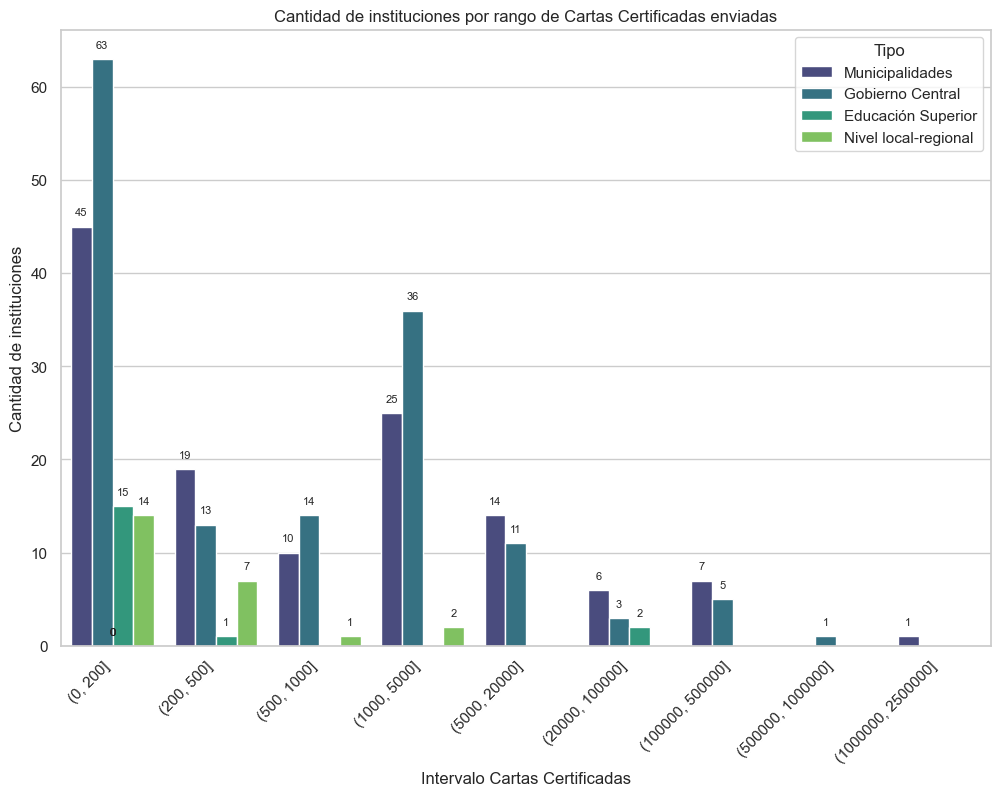

In [109]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

### P6.2

In [110]:
CostoCartCertificadas = cuestionario[["Tipo","P6.2"]]
CostoCartCertificadas = CostoCartCertificadas.replace({'#s.i.': 0, '#n.a.': 0})
CostoCartCertificadas["P6.2"] = CostoCartCertificadas["P6.2"].astype(int)

In [111]:
bin = [0, 5000, 15000, 40000, 100000, 200000, 400000, 700000, 1200000, 30000000, 50000000, 100000000, 200000000, 500000000, 16000000000]
bins = pd.cut(CostoCartCertificadas['P6.2'], bins=bin)
CostoCartCertificadas['intervalos'] = bins

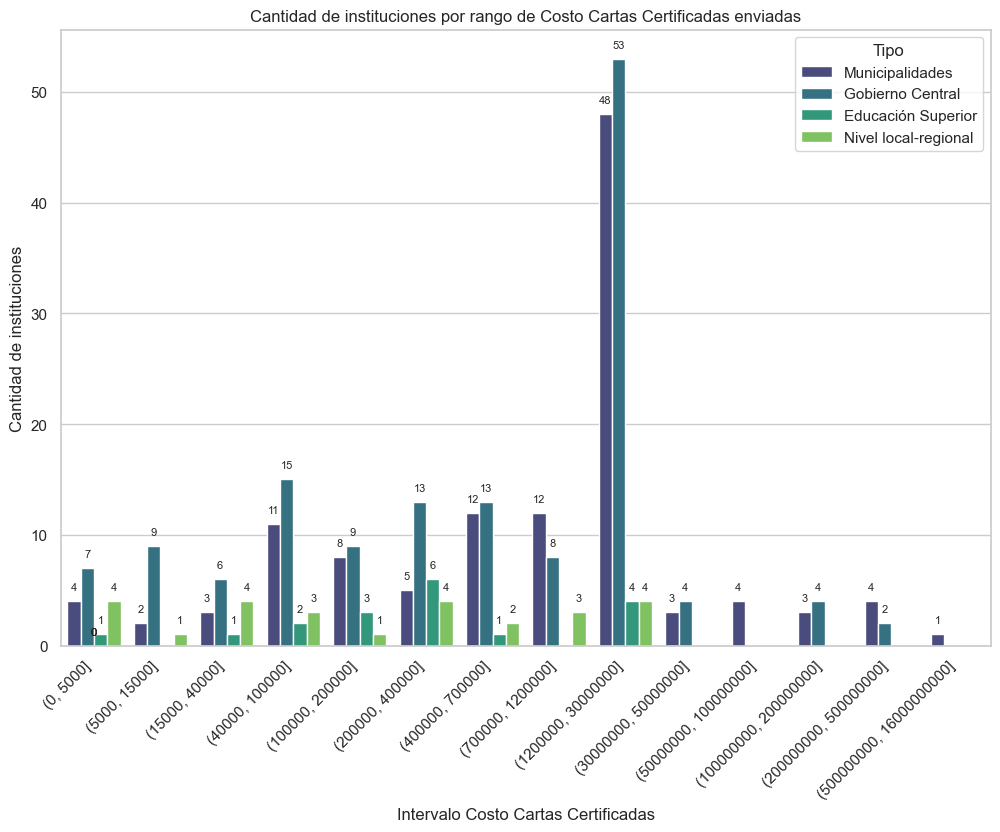

In [112]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoCartCertificadas, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo Cartas Certificadas')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo Cartas Certificadas enviadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [113]:
CostoPorCarta = cuestionario[["Tipo","P6.1","P6.2"]]
CostoPorCarta = CostoPorCarta.replace({'#s.i.': 0, '#n.a.': 0})
CostoPorCarta["CostoPorCarta"] = CostoPorCarta["P6.2"] / CostoPorCarta["P6.1"]
CostoPorCarta = CostoPorCarta.replace([np.inf, -np.inf], np.nan)
CostoPorCarta = CostoPorCarta.dropna()

In [114]:
bin = [0, 1000, 5000, 20000, 50000, 100000, 200000]
bins = pd.cut(CostoPorCarta['CostoPorCarta'], bins=bin)
CostoPorCarta['intervalos'] = bins

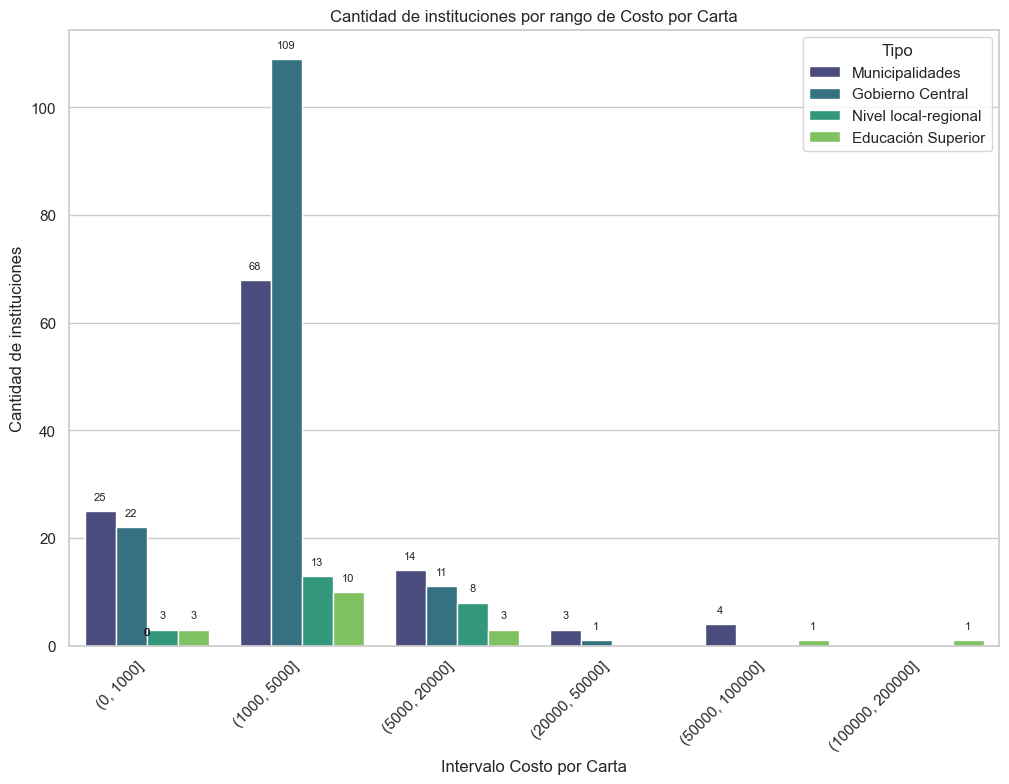

In [115]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='intervalos', hue='Tipo', data=CostoPorCarta, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Intervalo Costo por Carta')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por rango de Costo por Carta')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_19600\1479016640.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)


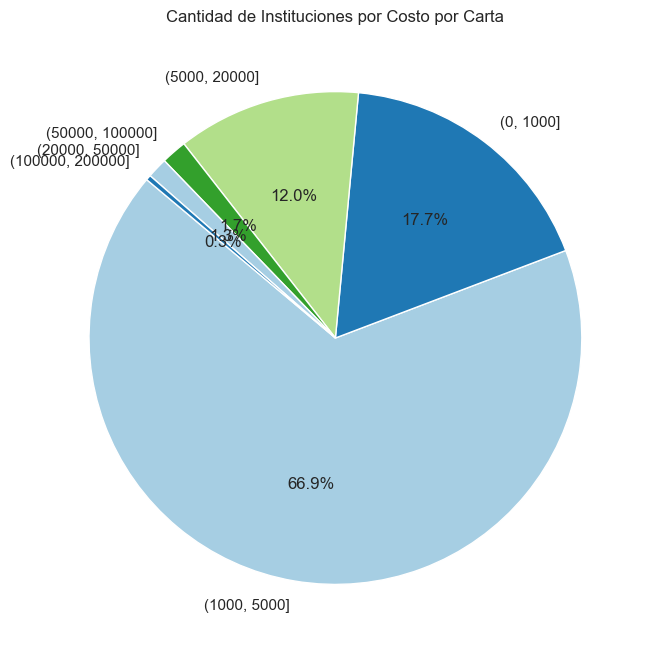

In [116]:
counts_df = CostoPorCarta.groupby(['intervalos', 'Tipo']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(CostoPorCarta['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Cantidad de Instituciones por Costo por Carta')

plt.show()

### P7.1

In [117]:
InterOtrasInstituciones = cuestionario[["Tipo","P7.1.1","P7.1.2","P7.1.3","P7.1.4","P7.1.5","P7.1.6"]]

In [118]:
SiInteractuan = InterOtrasInstituciones[["Tipo","P7.1.1"]]
SiInteractuan = SiInteractuan.replace({'#s.i.': 'No interactúan'})
SiInteractuan = SiInteractuan.dropna()
SiInteractuan['Interactuan'] = SiInteractuan['P7.1.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

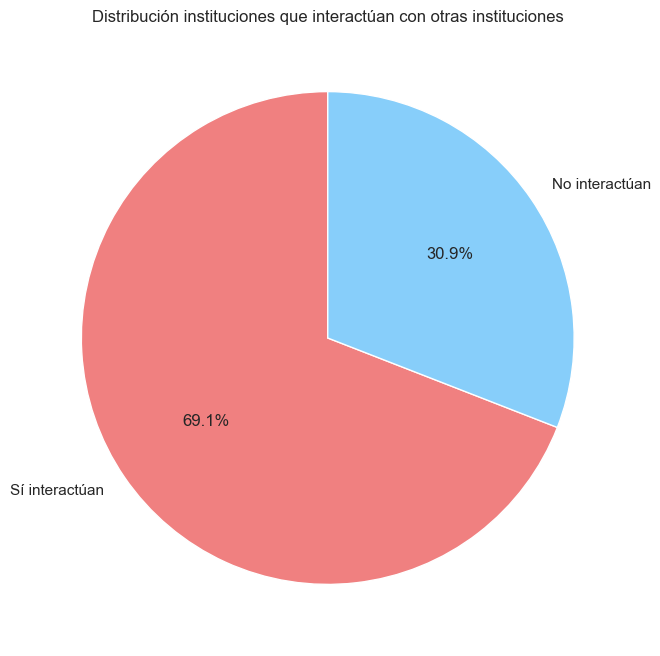

In [119]:
counts = SiInteractuan['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con otras instituciones')

plt.show()

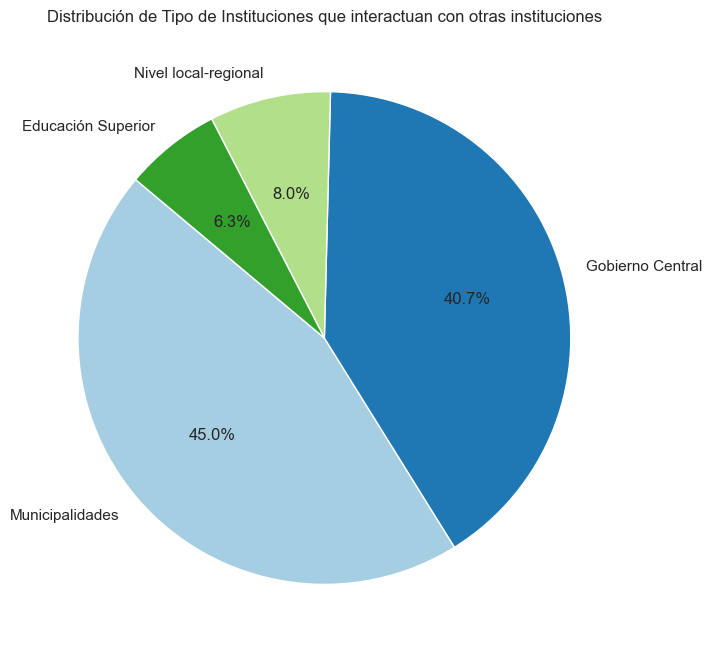

In [120]:
counts_df = SiInteractuan.groupby(['Tipo', 'P7.1.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuan['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con otras instituciones')

plt.show()

In [121]:
InterOtrasInstituciones = InterOtrasInstituciones.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstituciones = InterOtrasInstituciones.dropna()

In [122]:
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)
InterOtrasInstituciones['CantidadInteracciones'] = InterOtrasInstituciones['CantidadInteracciones'].replace(6,"Mas de 5")

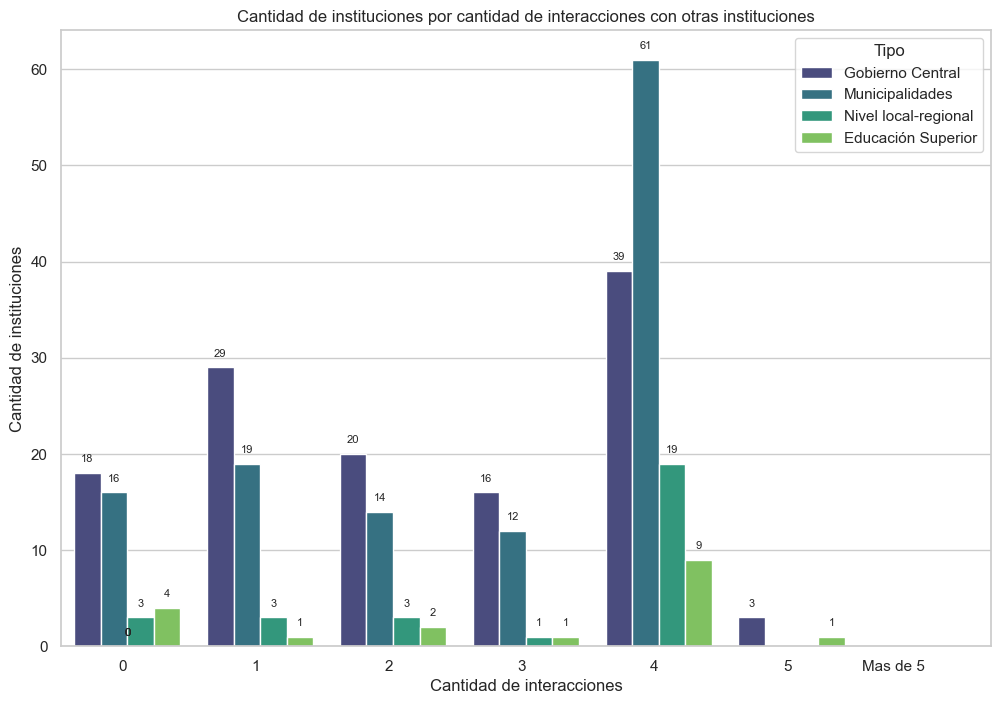

In [123]:
orden_arbitrario = [0,1,2,3,4,5,"Mas de 5"]
InterOtrasInstituciones['CantidadInteracciones'] = pd.Categorical(InterOtrasInstituciones['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstituciones = InterOtrasInstituciones.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstituciones, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con otras instituciones')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [124]:
columnas_interes = InterOtrasInstituciones.iloc[:, 1:7]  # Selecciona las columnas P7.1.1 a P7.1.6

In [125]:
conteo_total = columnas_interes.values.flatten()
conteo_total = pd.Series(conteo_total)
top_5_comunes = conteo_total.value_counts().head(6)
top_5_comunes = top_5_comunes.drop(0)
df_top_5_comunes = top_5_comunes.reset_index()
df_top_5_comunes.columns = ['Valor', 'Count']


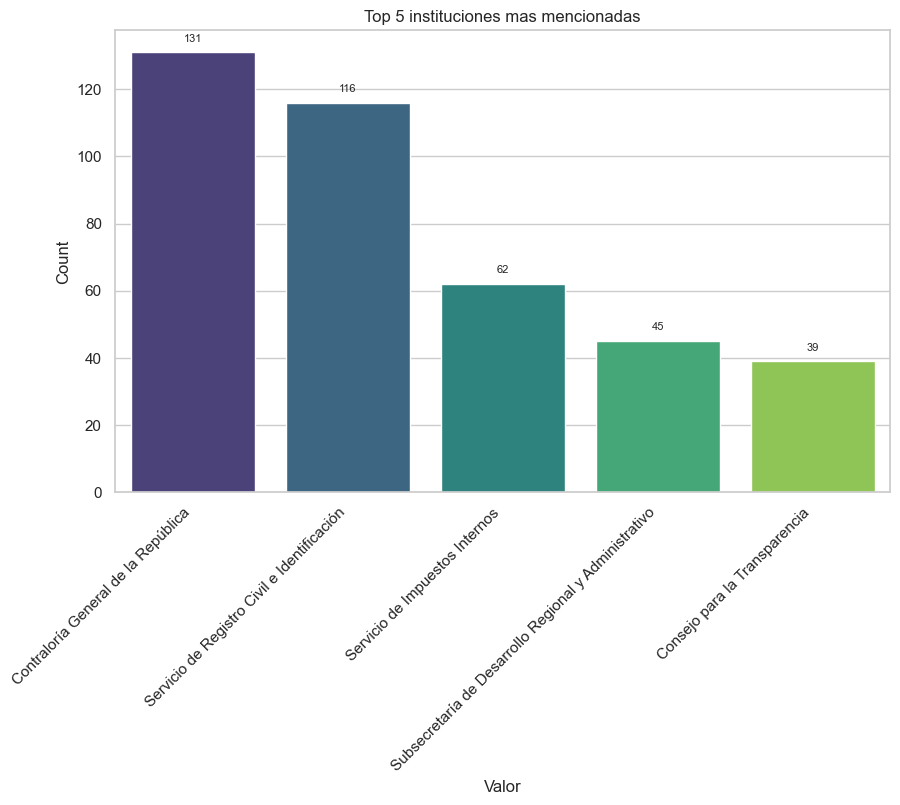

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=df_top_5_comunes, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 instituciones mas mencionadas')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

### P7.2

In [127]:
InterOtrasInstitucionesPriv = cuestionario[["Tipo","P7.2.1","P7.2.2","P7.2.3","P7.2.4","P7.2.5"]]

In [128]:
SiInteractuanPriv = InterOtrasInstitucionesPriv[["Tipo","P7.2.1"]]
SiInteractuanPriv = SiInteractuanPriv.replace({'#s.i.': 'No interactúan'})
SiInteractuanPriv = SiInteractuanPriv.dropna()
SiInteractuanPriv['Interactuan'] = SiInteractuanPriv['P7.2.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)

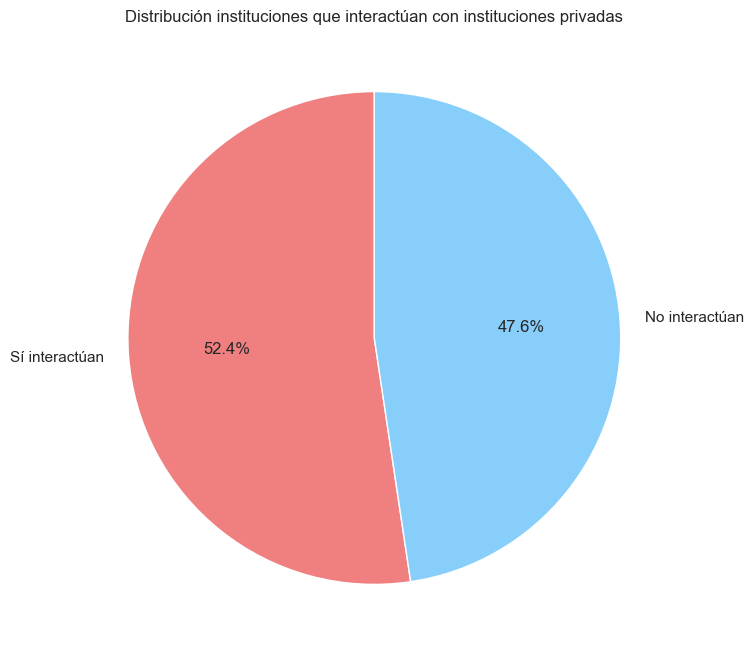

In [129]:
counts = SiInteractuanPriv['Interactuan'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])

plt.title('Distribución instituciones que interactúan con instituciones privadas')

plt.show()

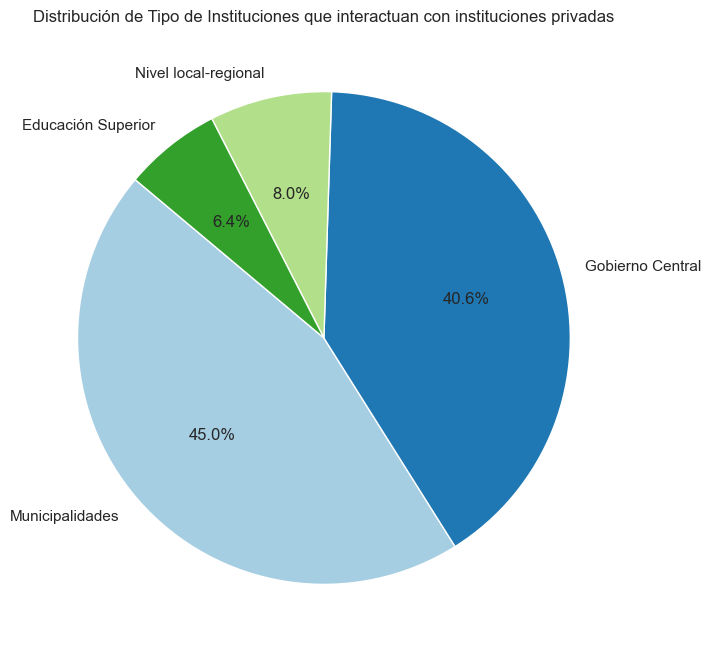

In [130]:
counts_df = SiInteractuanPriv.groupby(['Tipo', 'P7.2.1']).size().unstack().fillna(0)

counts_df['Total'] = counts_df.sum(axis=1)
counts_df = counts_df.sort_values(by='Total', ascending=False)

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Paired(range(len(SiInteractuanPriv['Tipo'].unique())))
ax.pie(counts_df['Total'], labels=counts_df.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribución de Tipo de Instituciones que interactuan con instituciones privadas')

plt.show()

In [131]:
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.replace({'#s.i.':np.nan, '#n.a.':0})
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.dropna()

In [132]:
InterOtrasInstitucionesPriv['CantidadInteracciones'] = InterOtrasInstitucionesPriv.iloc[:, 2:].apply(lambda row: sum(row != 0), axis=1)

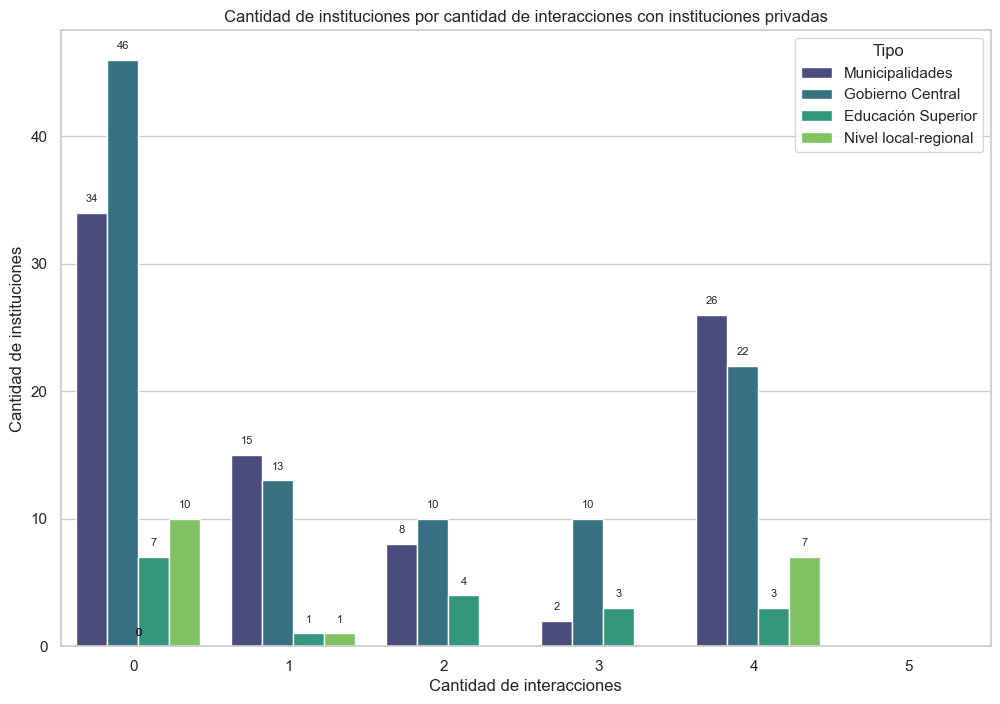

In [133]:
orden_arbitrario = [0,1,2,3,4,5]
InterOtrasInstitucionesPriv['CantidadInteracciones'] = pd.Categorical(InterOtrasInstitucionesPriv['CantidadInteracciones'], categories=orden_arbitrario, ordered=True)
InterOtrasInstitucionesPriv = InterOtrasInstitucionesPriv.sort_values(by='CantidadInteracciones')

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='CantidadInteracciones', hue='Tipo', data=InterOtrasInstitucionesPriv, palette='viridis')

plt.xticks(rotation=0, ha='right')
plt.xlabel('Cantidad de interacciones')
plt.ylabel('Cantidad de instituciones')
plt.title('Cantidad de instituciones por cantidad de interacciones con instituciones privadas')

for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=8)

plt.show()

In [134]:
columnas_interes_priv = InterOtrasInstitucionesPriv.iloc[:, 1:6] 

In [135]:
conteo_total_priv = columnas_interes_priv.values.flatten()
conteo_total_priv = pd.Series(conteo_total_priv)
top_5_comunes_priv = conteo_total_priv.value_counts().head(6)
top_5_comunes_priv = top_5_comunes_priv.drop(0)
top_5_comunes_priv = top_5_comunes_priv.reset_index()
top_5_comunes_priv.columns = ['Valor', 'Count']


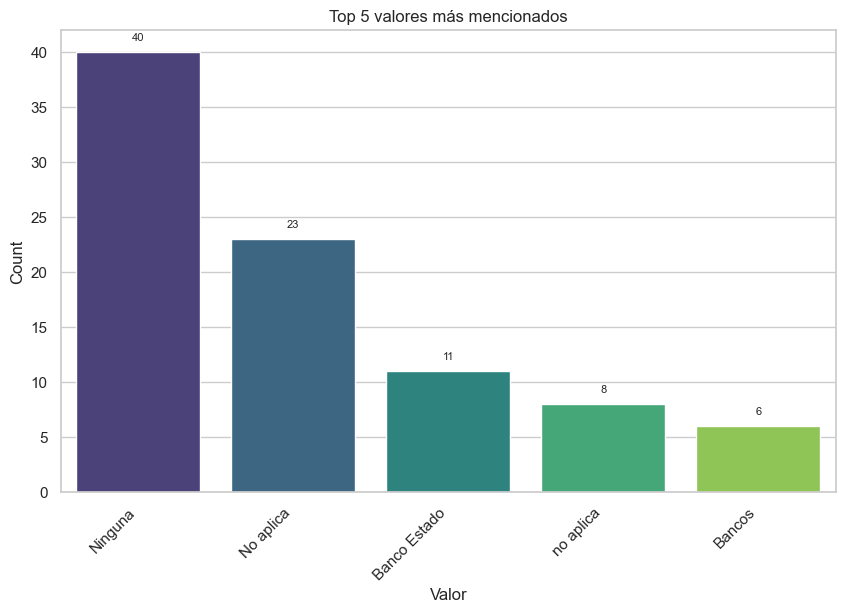

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Valor',x="Valor", y='Count', data=top_5_comunes_priv, palette="viridis",legend=False)

plt.xlabel('Valor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top 5 valores más mencionados')

for p in plt.gca().patches:
    height = p.get_height()
    if not pd.isna(height):
        plt.gca().annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

### P7.3

In [137]:
MecanismosIntercambio = cuestionario[["Tipo","P7.3"]]
MecanismosIntercambio = MecanismosIntercambio.replace({'#s.i.':'Sin Información'})

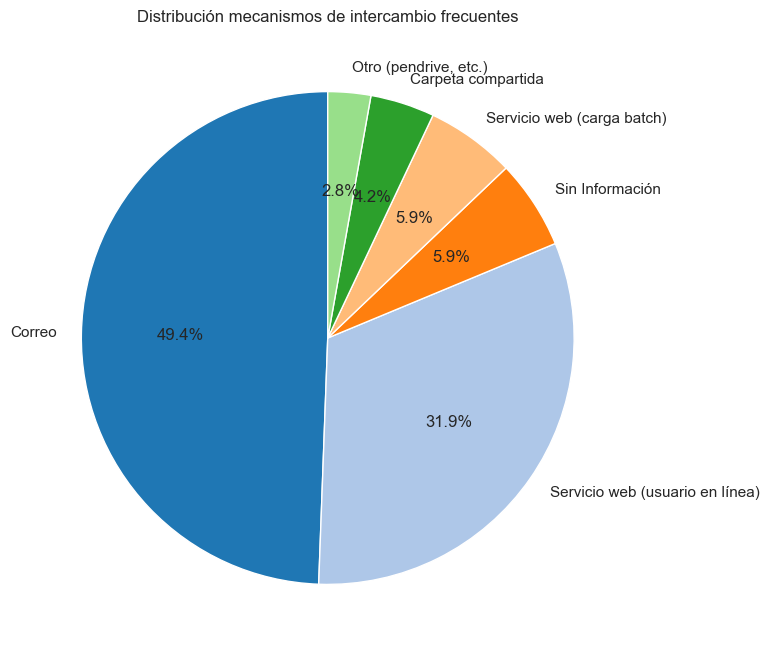

In [138]:
counts = MecanismosIntercambio['P7.3'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('Distribución mecanismos de intercambio frecuentes')

plt.show()

## Análisis Etapa 2

### P2.3

In [248]:
InsSinEquipo = cuestionario[['Fecha de respuesta',"Tipo","P1.1.1","P2.2","P2.3"]]
InsSinEquipo = InsSinEquipo[InsSinEquipo['P2.2']=="No"]
InsSinEquipo = InsSinEquipo[~(InsSinEquipo['P2.3']=="#s.i.")]

# Ejemplos
InsSinEquipo["TipoCoberturaTI"] = ""
InsSinEquipo.at[8,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[41,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[199,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[97,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[11,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[225,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[223,"TipoCoberturaTI"] = "Otro instituto"
InsSinEquipo.at[92,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[81,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[189,"TipoCoberturaTI"] = "Soporte tecnico"
InsSinEquipo.at[27,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[21,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[127,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[60,"TipoCoberturaTI"] = "Empleados regulares"
InsSinEquipo.at[68,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[160,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[288,"TipoCoberturaTI"] = "Empleado unico"
InsSinEquipo.at[350,"TipoCoberturaTI"] = "Tercerizado"
InsSinEquipo.at[412,"TipoCoberturaTI"] = "Empleados regulares"
InsSinEquipo.at[231,"TipoCoberturaTI"] = "Soporte tecnico"

training_data = InsSinEquipo[InsSinEquipo['TipoCoberturaTI'] != '']

train_data, test_data, train_labels, test_labels = train_test_split(
    training_data['P2.3'],
    training_data['TipoCoberturaTI'],
    test_size=0.2,
    random_state=42
)
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

classifier = MultinomialNB()
classifier.fit(train_vectors, train_labels)
InsSinEquipo['Prediccion_Categoria'] = classifier.predict(vectorizer.transform(InsSinEquipo['P2.3']))
InsSinEquipo.drop(columns="TipoCoberturaTI",inplace=True)
InsSinEquipo.rename(columns={"Prediccion_Categoria":"CoberturaTI"}, inplace=True)

In [140]:
TipoCobertura = InsSinEquipo[["Tipo","CoberturaTI"]]

¿Cómo cubren las necesidades de informática las instituciones sin equipo propio?

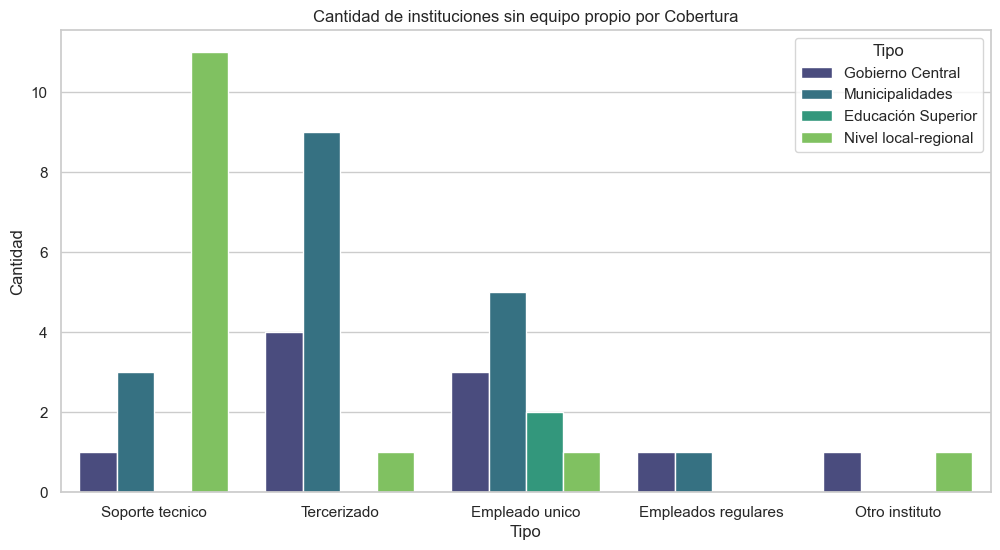

In [141]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CoberturaTI', hue='Tipo', data=TipoCobertura, palette='viridis')
plt.title('Cantidad de instituciones sin equipo propio por Cobertura')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

### P8.2 y P2.2

In [155]:
EquipoYPlanMejora = cuestionario[["Tipo","P2.2","P8.2"]]
EquipoYPlanMejora = EquipoYPlanMejora.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información',"Sí":"Si","No, sin embargo estamos trabajando en la elaboración de un plan de mejora continua de nuestras plataformas":"Plan en proceso"})

Instituciones con plan de mejora de plataformas

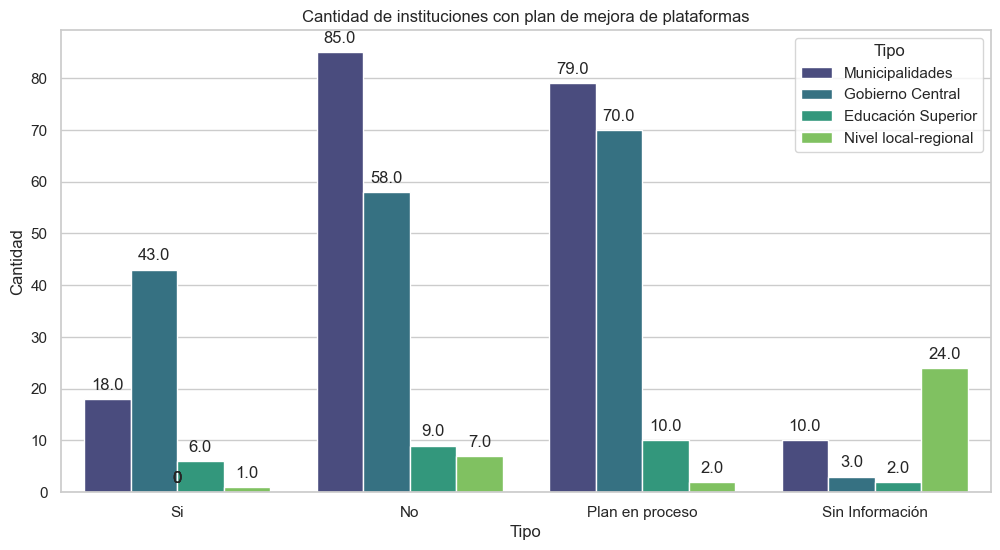

In [157]:
orden = ['Si', 'No', 'Plan en proceso', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P8.2', hue='Tipo', data=EquipoYPlanMejora, palette='viridis', order=orden)
plt.title('Cantidad de instituciones con plan de mejora de plataformas')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Instituciones con área de informática

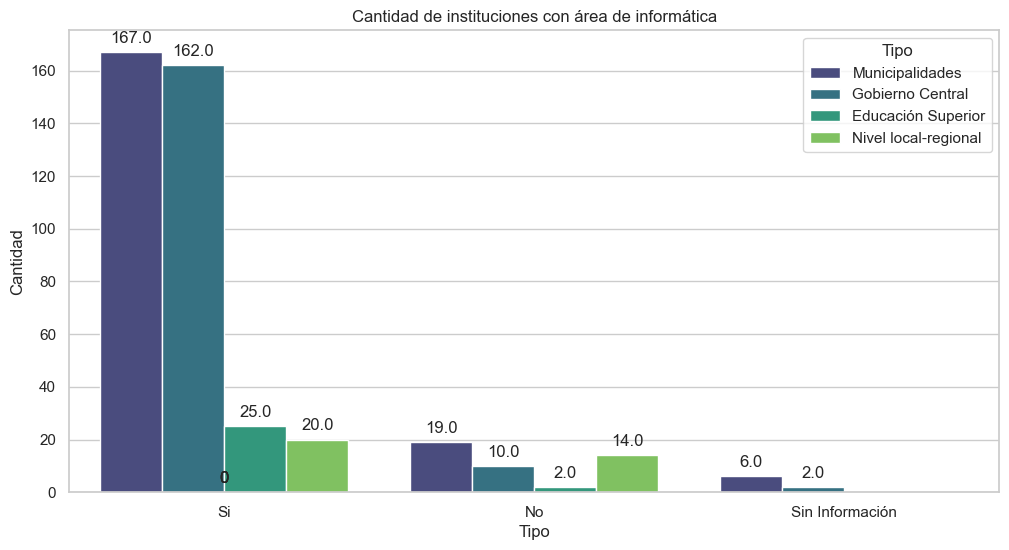

In [159]:
ordenar = ['Si', 'No', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P2.2', hue='Tipo', data=EquipoYPlanMejora, palette='viridis', order=ordenar)
plt.title('Cantidad de instituciones con área de informática')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [169]:
EquipoYPlanMejoraCruce = EquipoYPlanMejora[EquipoYPlanMejora['P2.2']!="Sin Información"]

Relaciones entre instituciones con área informatica y plan de mejora de plataformas

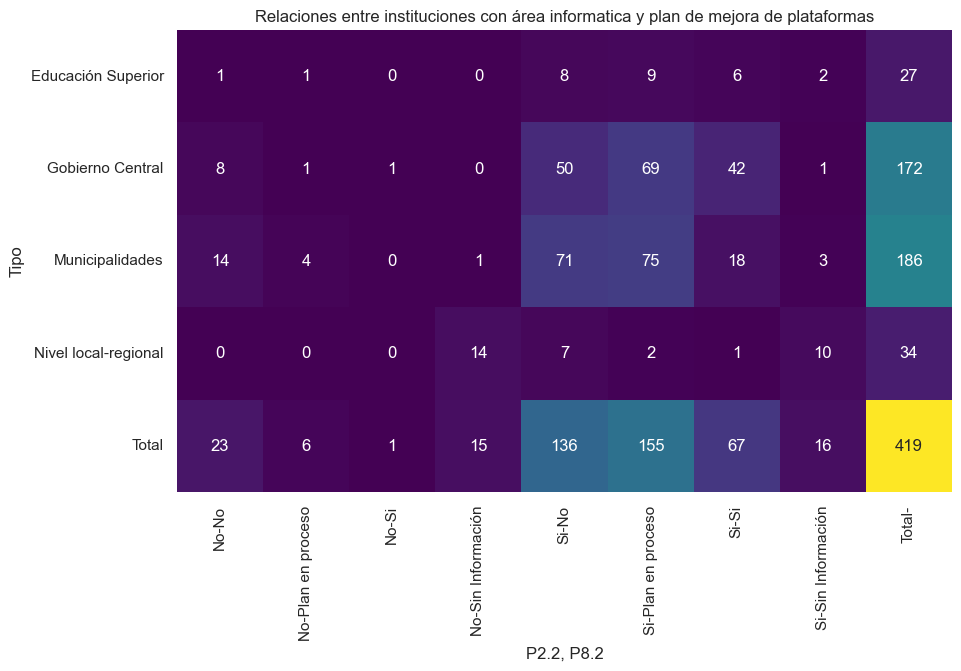

In [173]:
tabla_contingencia = pd.crosstab(index=EquipoYPlanMejoraCruce['Tipo'], columns=[EquipoYPlanMejoraCruce['P2.2'], EquipoYPlanMejoraCruce['P8.2']], margins=True, margins_name="Total")

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Relaciones entre instituciones con área informatica y plan de mejora de plataformas')
plt.xlabel('P2.2, P8.2')
plt.ylabel('Tipo')
plt.show()

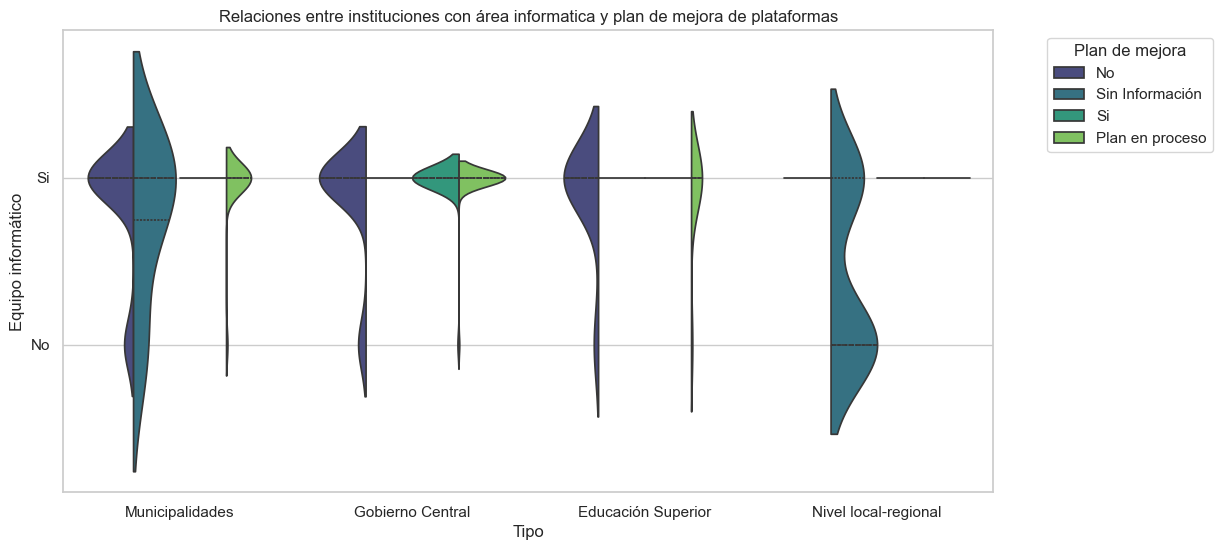

In [177]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Tipo', y='P2.2', hue='P8.2', data=EquipoYPlanMejoraCruce, split=True, inner='quartile', palette='viridis')
plt.title('Relaciones entre instituciones con área informatica y plan de mejora de plataformas')
plt.xlabel('Tipo')
plt.ylabel('Equipo informático')
plt.legend(title="Plan de mejora", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### P3

In [183]:
PlanImplementacion = cuestionario[["Tipo", "P3.1", "P3.4"]]
PlanImplementacion = PlanImplementacion.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información'})

Instituciones con plan de implementacón de la ley 21.180

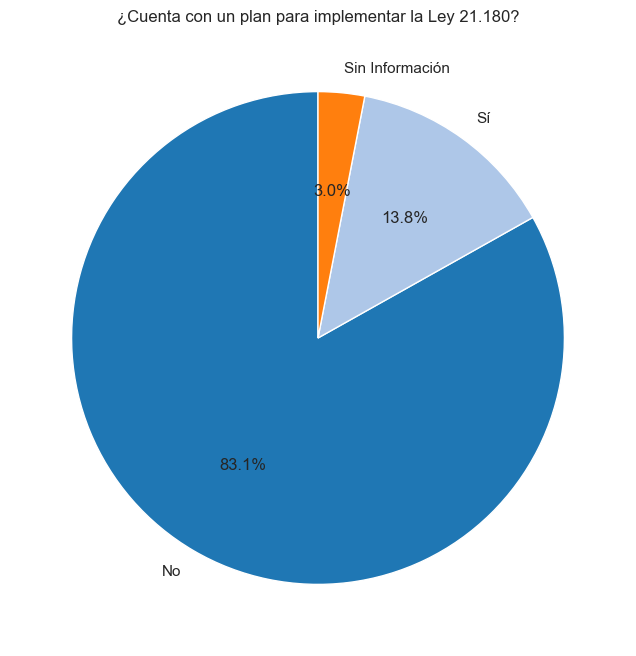

In [185]:
counts = PlanImplementacion['P3.1'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('¿Cuenta con un plan para implementar la Ley 21.180?')

plt.show()

Frecuencia de instituciones por actualizacion de avances y tipo

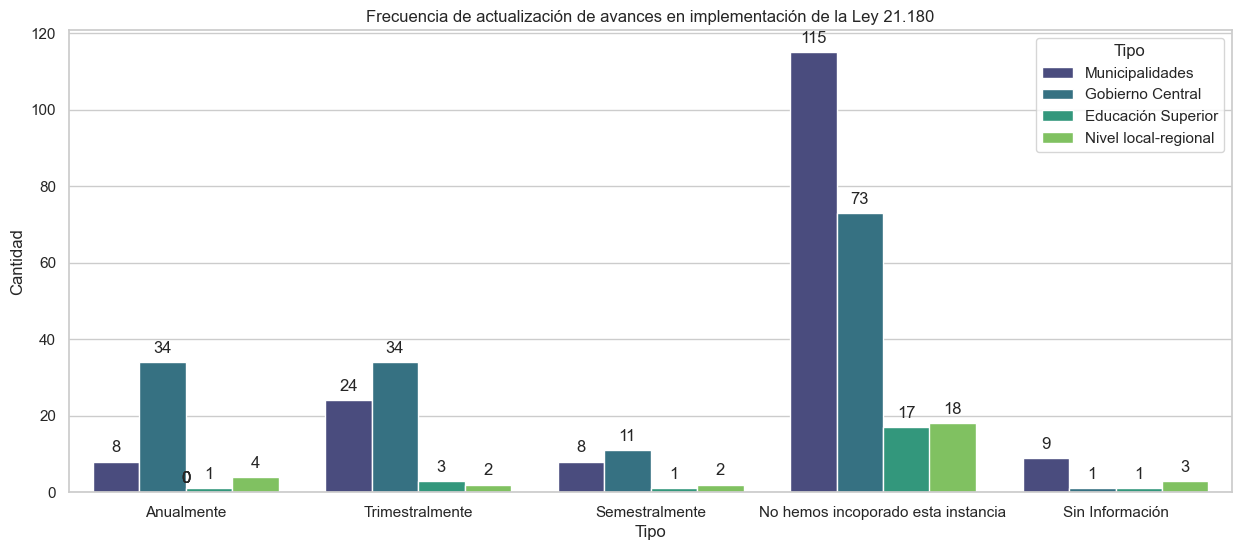

In [247]:
orden = ['Anualmente', 'Trimestralmente', 'Semestralmente','Anualmente', 'No hemos incoporado esta instancia', 'Sin Información']
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='P3.4', hue='Tipo', data=PlanImplementacion, palette='viridis', order=orden)
plt.title('Frecuencia de actualización de avances en implementación de la Ley 21.180')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [192]:
ConPlanImplementacion = PlanImplementacion[PlanImplementacion['P3.1']=="Sí"]

Frecuencia de instituciones por actualizacion de avances y tipo - Solo aquellas con plan de implementacion

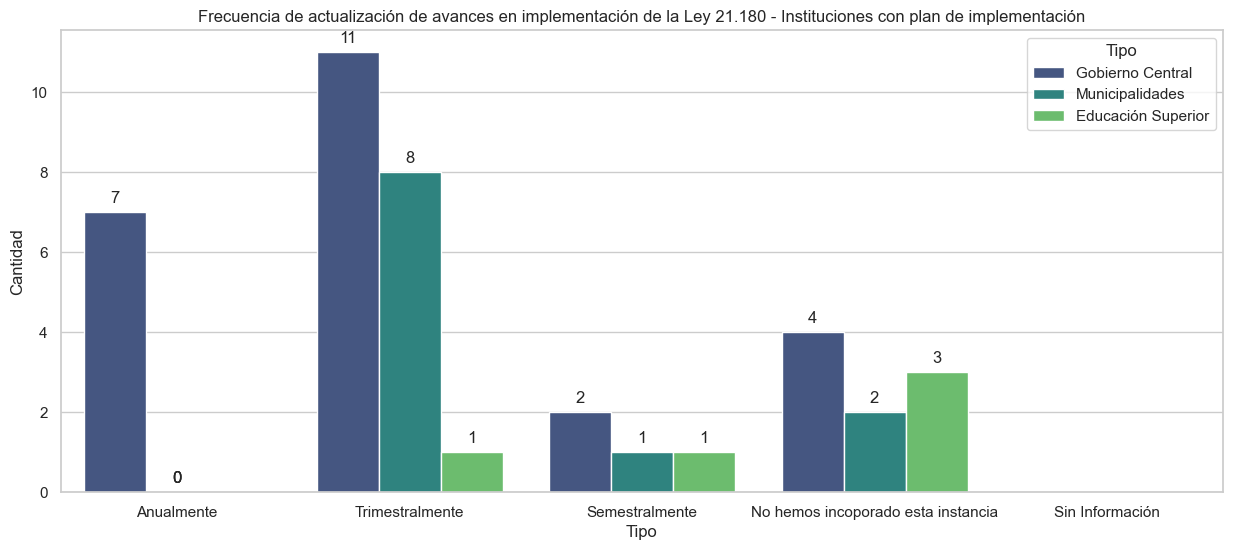

In [246]:
orden = ['Anualmente', 'Trimestralmente', 'Semestralmente','Anualmente', 'No hemos incoporado esta instancia', 'Sin Información']
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='P3.4', hue='Tipo', data=ConPlanImplementacion, palette='viridis', order=orden)
plt.title('Frecuencia de actualización de avances en implementación de la Ley 21.180 - Instituciones con plan de implementación')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [179]:
EjesExternos = cuestionario[["Tipo", "P3.5.1", "P3.5.2", "P3.5.3", "P3.5.4", "P3.5.5"]]

In [237]:
EjesExternos = EjesExternos.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', '#n.s.': 'Sin Información'})
EjesExternos = EjesExternos.replace({'Fortalecimiento del equipo de Transformación Digital (formación, capacitación, atracción de talento).': 'Fortalecimiento del equipo de Transformación Digital', 'Gestión del cambio de los funcionarios (planes de sensibilización, difusión de la LTD, adopción de nuevas herramientas)':'Gestión del cambio de los funcionarios', 'Uso intensivo de datos para la gestión institucional (recolección, anonimización, limpieza, publicación, difusión, análisis, reutilización de datos)':'Uso intensivo de datos para la gestión institucional','Otro (¿cuál?)':'Otro'})

Otros ejes trabajados por las instituciones

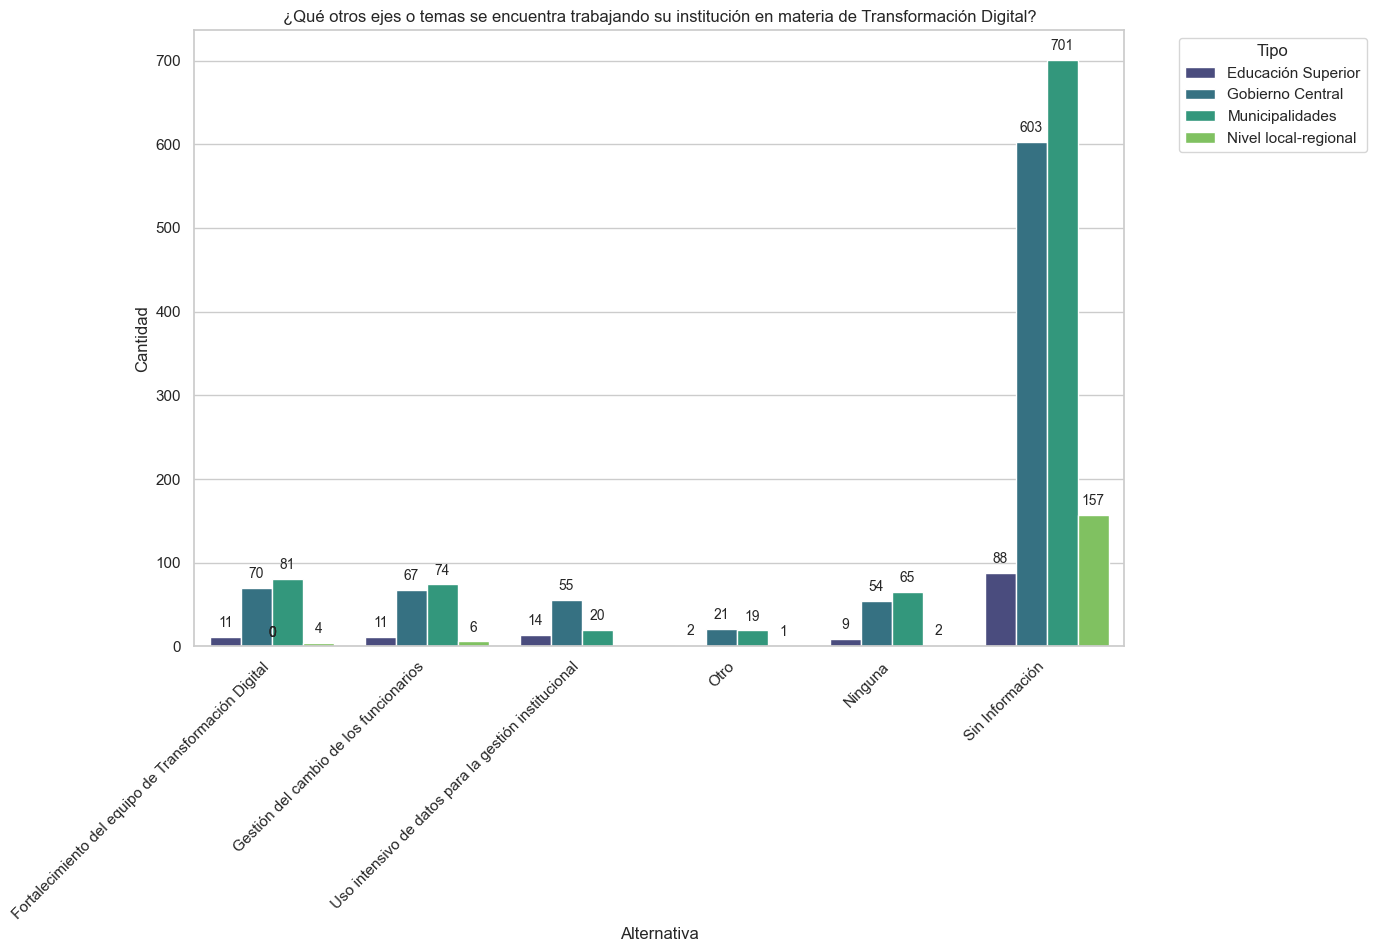

In [245]:
orden = ['Fortalecimiento del equipo de Transformación Digital', 'Gestión del cambio de los funcionarios', 'Uso intensivo de datos para la gestión institucional', 'Otro','Ninguna', 'Sin Información']
melted_df = EjesExternos.melt(id_vars=['Tipo'], var_name='Alternativa', value_name='Respuesta')
count_df = melted_df.groupby(['Tipo', 'Respuesta']).size().reset_index(name='Cantidad')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Respuesta', y='Cantidad', hue='Tipo', data=count_df, palette='viridis', order=orden)

plt.title('¿Qué otros ejes o temas se encuentra trabajando su institución en materia de Transformación Digital?')
plt.xlabel('Alternativa')
plt.ylabel('Cantidad')
plt.legend(title="Tipo", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.show()

### P10.4

In [282]:
InsApp = cuestionario[["Tipo", "P10.4"]]
InsApp = InsApp.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información'})

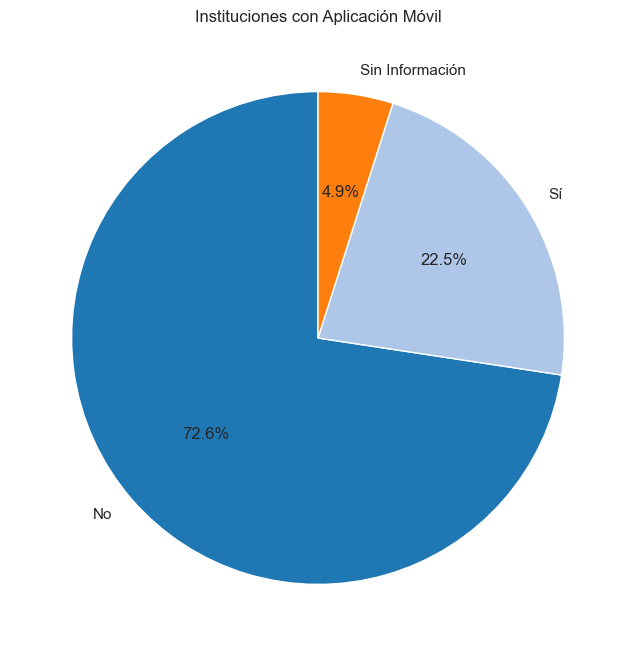

In [284]:
counts = InsApp['P10.4'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

plt.title('Instituciones con Aplicación Móvil')

plt.show()

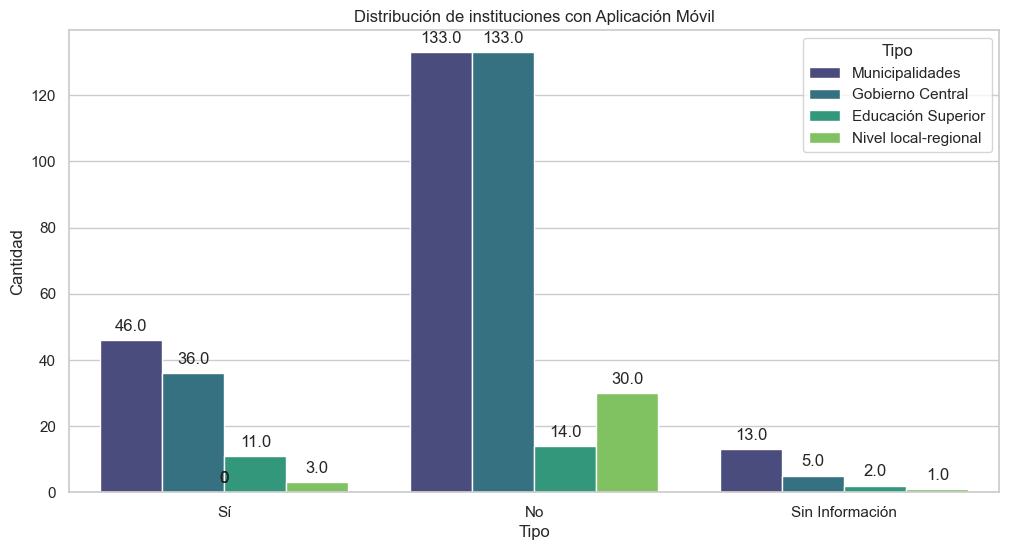

In [287]:
orden = ['Sí', 'No', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P10.4', hue='Tipo', data=InsApp, palette='viridis', order=orden)
plt.title('Distribución de instituciones con Aplicación Móvil')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [289]:
GastosTIC = cuestionario[["Tipo","P10.4","P13.GC.2.1","P13.GC.2.2","P13.GC.2.3","P13.GC.2.4","P13.GC.2.5","P13.GC.2.6","P13.GC.3.1","P13.GC.3.2","P13.GC.3.3","P13.GC.3.4","P13.GC.3.5","P13.GC.3.6","P13.GC.3.7","P13.GC.3.8"]]
GastosTIC = GastosTIC.replace({'#s.i.': 0, '#n.a.': 0})
GastosTIC["TotalGastos"] = GastosTIC.iloc[:, 2:-1].sum(axis=1)
GastosTICTotal = GastosTIC[["Tipo","P10.4","TotalGastos"]]
GastosTICTotal = GastosTICTotal[GastosTICTotal["TotalGastos"] != 0]

In [293]:
promedio_por_p10_4 = GastosTICTotal.groupby(['Tipo', 'P10.4'])['TotalGastos'].mean().reset_index()


C:\Users\alejo\AppData\Local\Temp\ipykernel_19600\1299246838.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1e6)) for x in ax.get_yticks()])


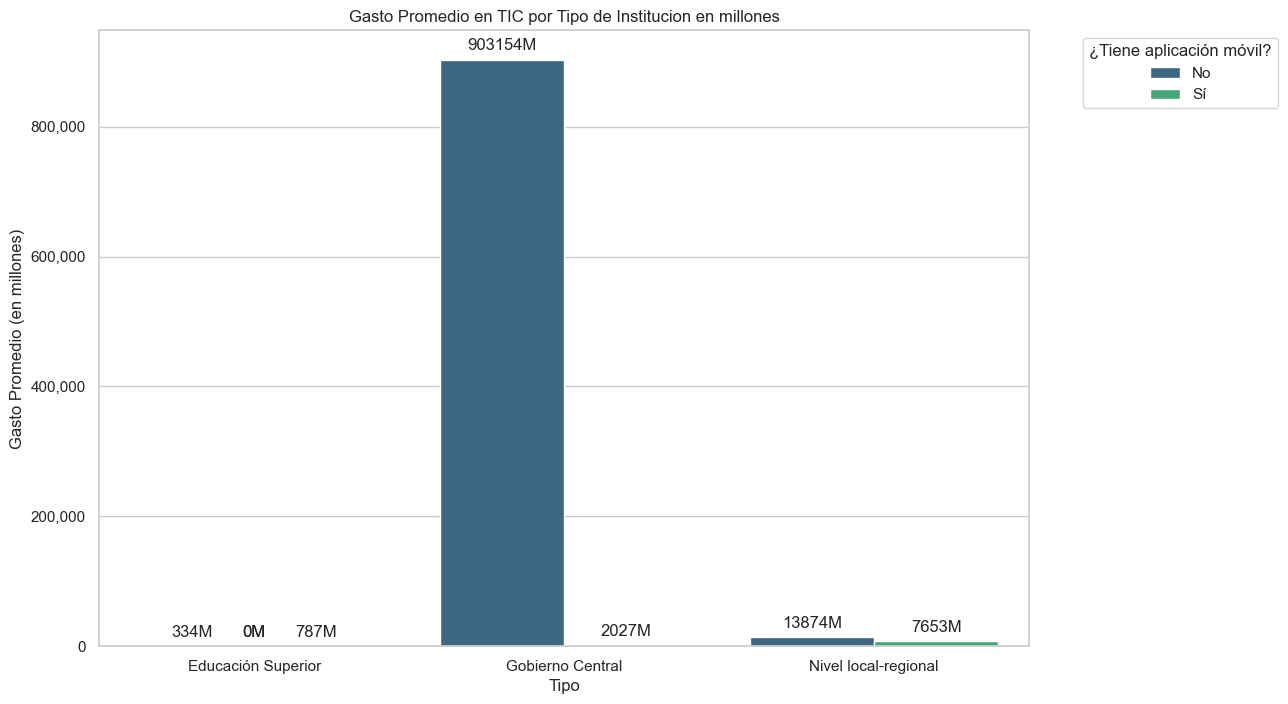

In [305]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Tipo', y='TotalGastos', hue='P10.4', data=promedio_por_p10_4, errorbar=None, palette='viridis')

ax.set_yticklabels(['{:,}'.format(int(x/1e6)) for x in ax.get_yticks()])


plt.title('Gasto Promedio en TIC por Tipo de Institucion en millones')
plt.xlabel('Tipo')
plt.ylabel('Gasto Promedio (en millones)')
plt.legend(title="¿Tiene aplicación móvil?", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()/1e6)}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### P4.4 y P5.5

In [4]:
GDyDF = cuestionario[["Tipo","P4.4","P5.5"]]
GDyDF.loc[:, "P4.4"] = GDyDF["P4.4"].replace({'#s.i.': 0, '#n.a.': 0})
GDyDF.loc[:, "P5.5"] = GDyDF["P5.5"].replace({'#s.i.': "Sin Información"})

Relacion entre presencia de politica de gestión documental con cantidad de documentos firmados electronicamente

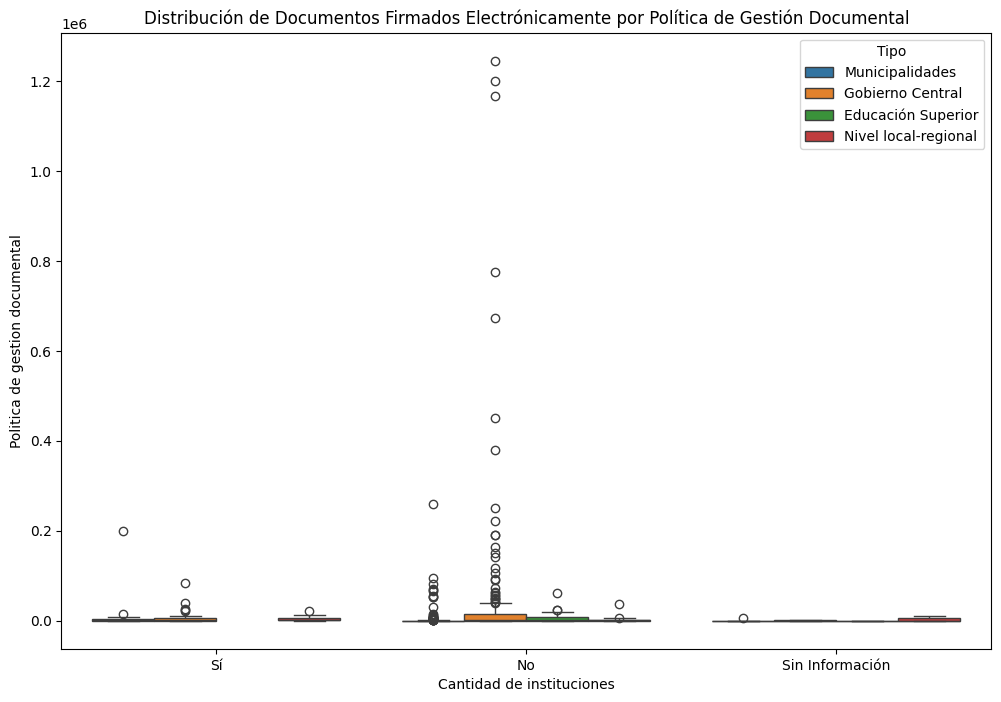

In [113]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(12, 8))
sns.boxplot(x='P5.5', y='P4.4', data=GDyDF, hue='Tipo', order=orden)
plt.title('Distribución de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.ylabel('Politica de gestion documental')
plt.xlabel('Cantidad de instituciones')
plt.show()

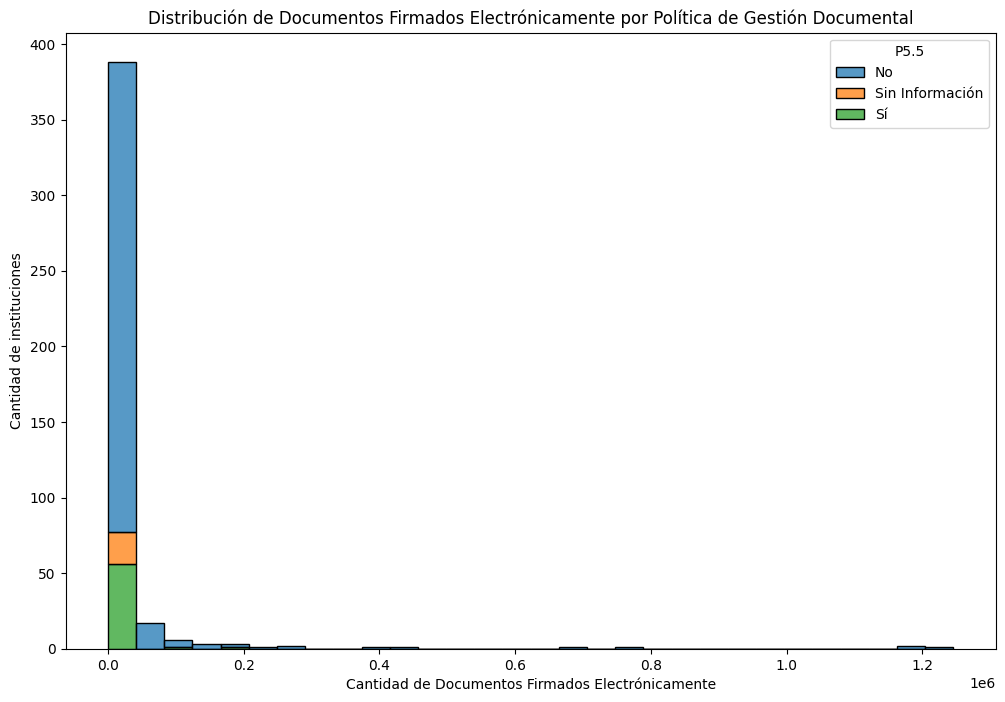

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(data=GDyDF, x='P4.4', hue='P5.5', multiple='stack', bins=30)
plt.title('Distribución de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.xlabel('Cantidad de Documentos Firmados Electrónicamente')
plt.ylabel('Cantidad de instituciones')
plt.show()

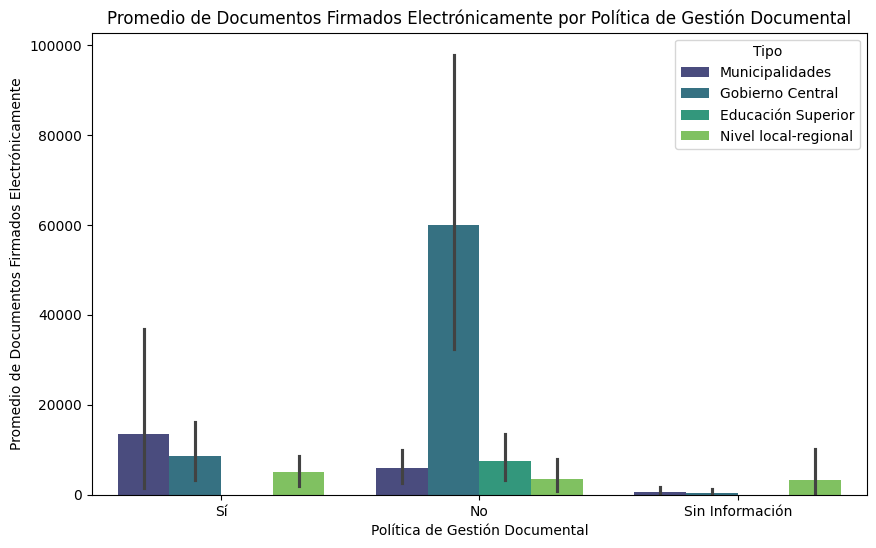

In [18]:
orden = ["Sí", "No", "Sin Información"]
plt.figure(figsize=(10, 6))
sns.barplot(x='P5.5', y='P4.4', data=GDyDF, hue='Tipo', palette='viridis', order=orden)
plt.title('Promedio de Documentos Firmados Electrónicamente por Política de Gestión Documental')
plt.xlabel('Política de Gestión Documental')
plt.ylabel('Promedio de Documentos Firmados Electrónicamente')
plt.show()

### P8.1 y P7.1

In [45]:
PlataformasInterop = cuestionario[["Tipo","P7.1.1","P8.1"]]


In [46]:
PlataformasInterop["P7.1.1"] = PlataformasInterop["P7.1.1"].replace({'#s.i.': 'No interactúan'})
PlataformasInterop = PlataformasInterop.dropna()
PlataformasInterop['Interactuan'] = PlataformasInterop['P7.1.1'].apply(lambda x: 'Sí interactúan' if x != 'No interactúan' else x)
PlataformasInterop["P8.1"] = PlataformasInterop["P8.1"].replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información', 'No, sin embargo estamos trabajando en la identificación de las plataformas electrónicas':'En proceso'})
PlataformasInterop = PlataformasInterop[['Tipo', 'Interactuan', 'P8.1']]

C:\Users\alejo\AppData\Local\Temp\ipykernel_6908\551549542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlataformasInterop["P7.1.1"] = PlataformasInterop["P7.1.1"].replace({'#s.i.': 'No interactúan'})


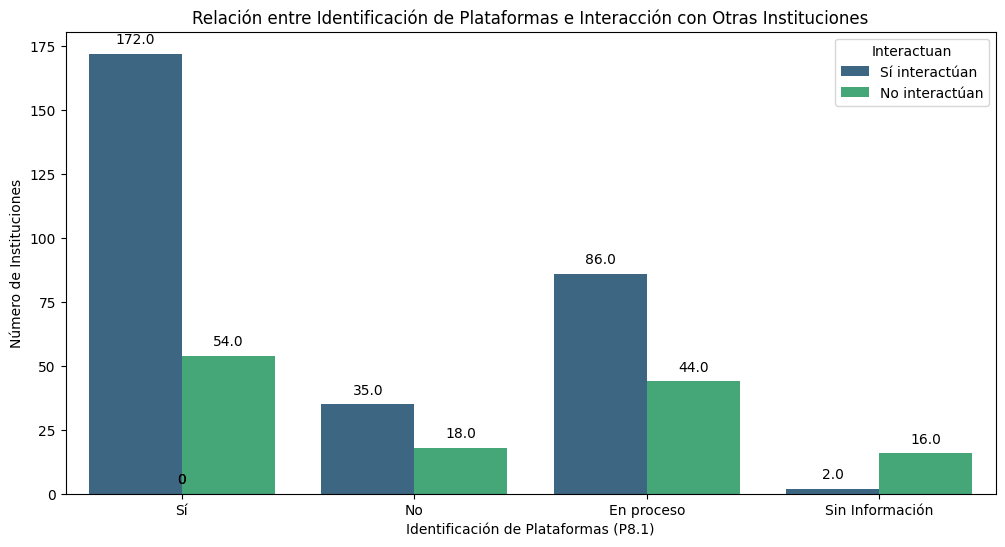

In [68]:
orden = ['Sí', 'No', 'En proceso', 'Sin Información']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='P8.1', hue='Interactuan', data=PlataformasInterop, palette='viridis', order=orden)
plt.title('Relación entre Identificación de Plataformas e Interacción con Otras Instituciones')
plt.xlabel('Identificación de Plataformas (P8.1)')
plt.ylabel('Número de Instituciones')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### P11.4 P11.9

Relacion medidas de seguridad implementadas con las actividades de difusión y entrenamiento sobre seguridad de la información.

In [110]:
MedidasyEntrenamiento = cuestionario[["Tipo", "P11.4", "P11.9.1","P11.9.2","P11.9.3","P11.9.4","P11.9.5","P11.9.6","P11.9.7","P11.9.8","P11.9.9","P11.9.10","P11.9.11","P11.9.12"]]
MedidasyEntrenamiento = MedidasyEntrenamiento.replace({'#s.i.': 'Sin Información', '#n.a.': 'Sin Información',"#n.a.":"Sin Información","#s.i.":"Sin Información","#n.s.":"Sin Información","#n.a.":"Sin Información"})

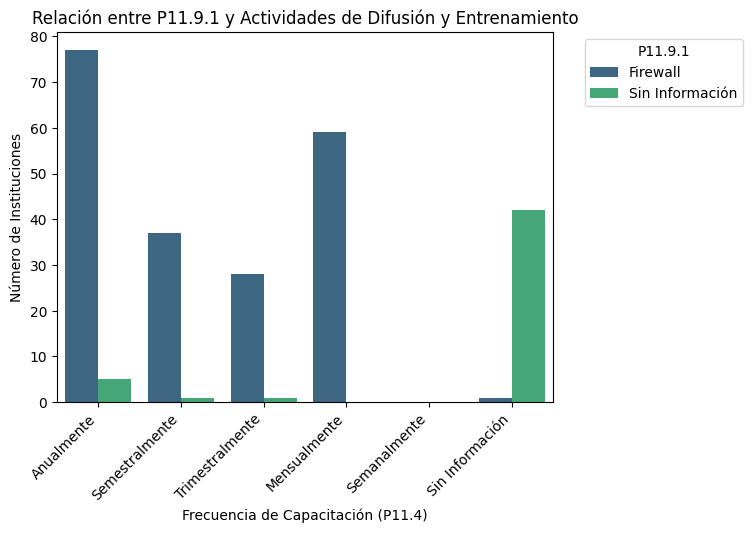

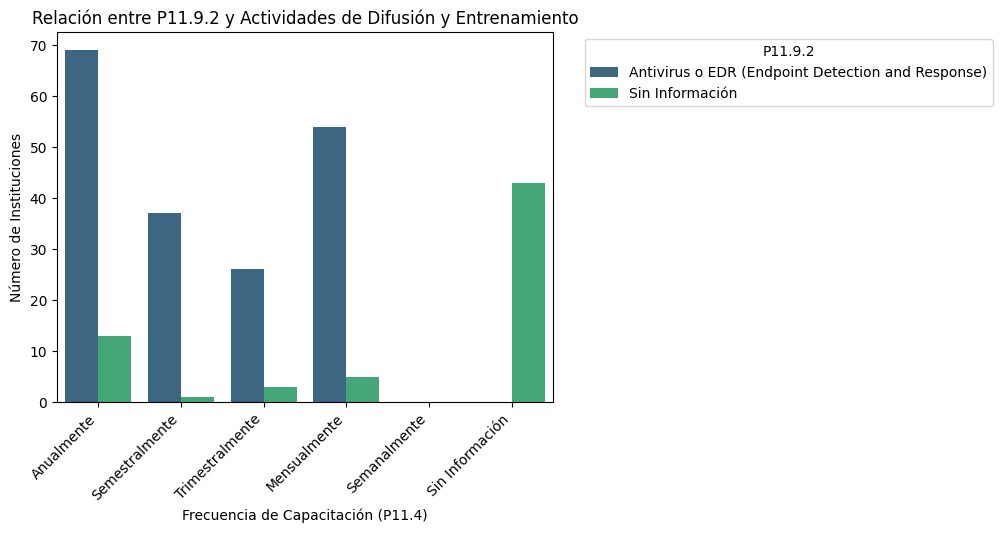

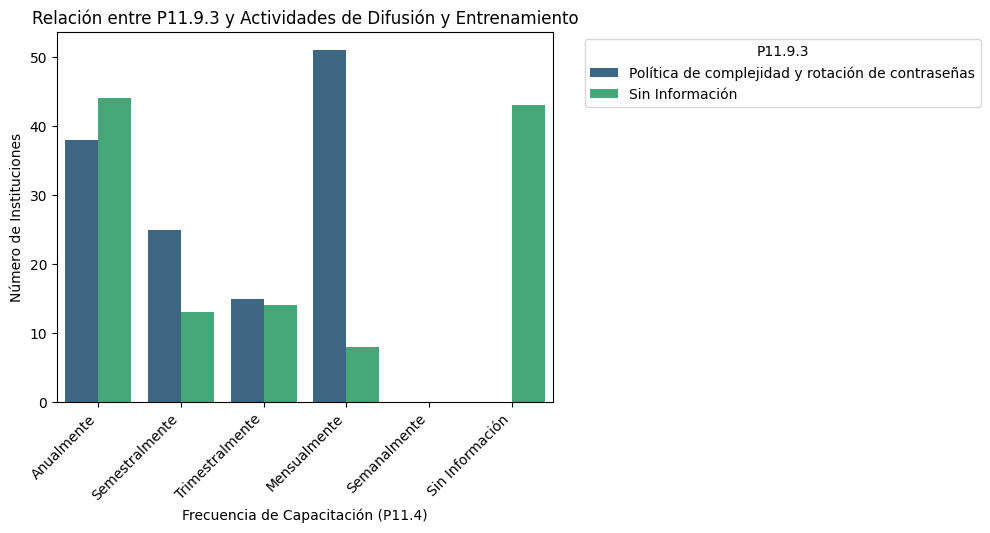

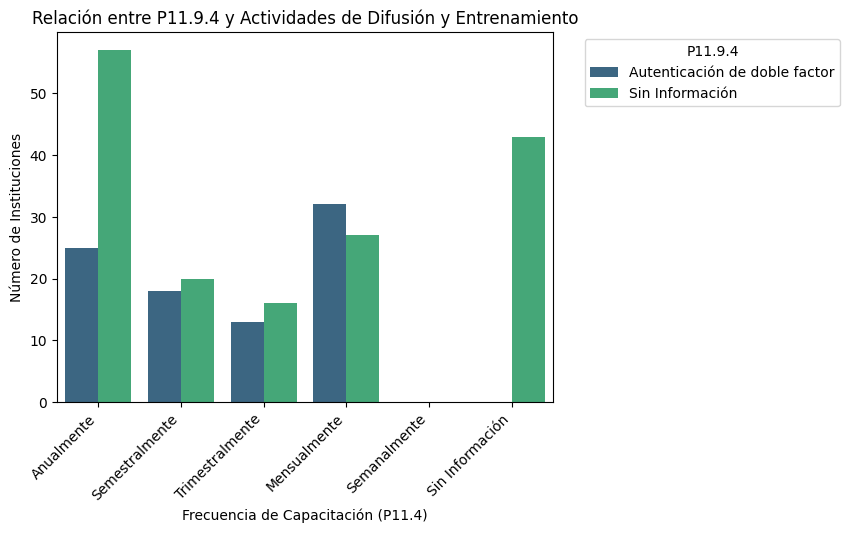

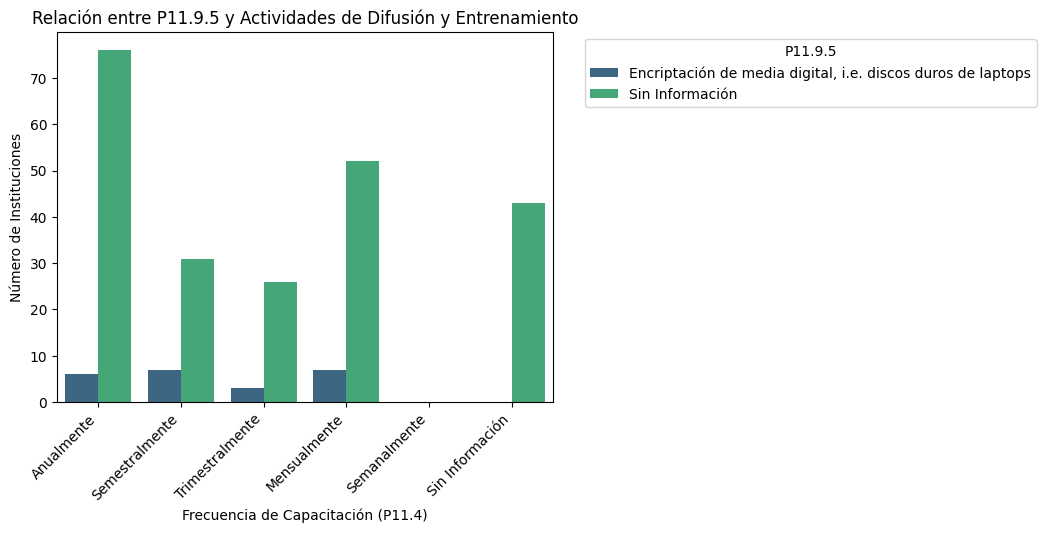

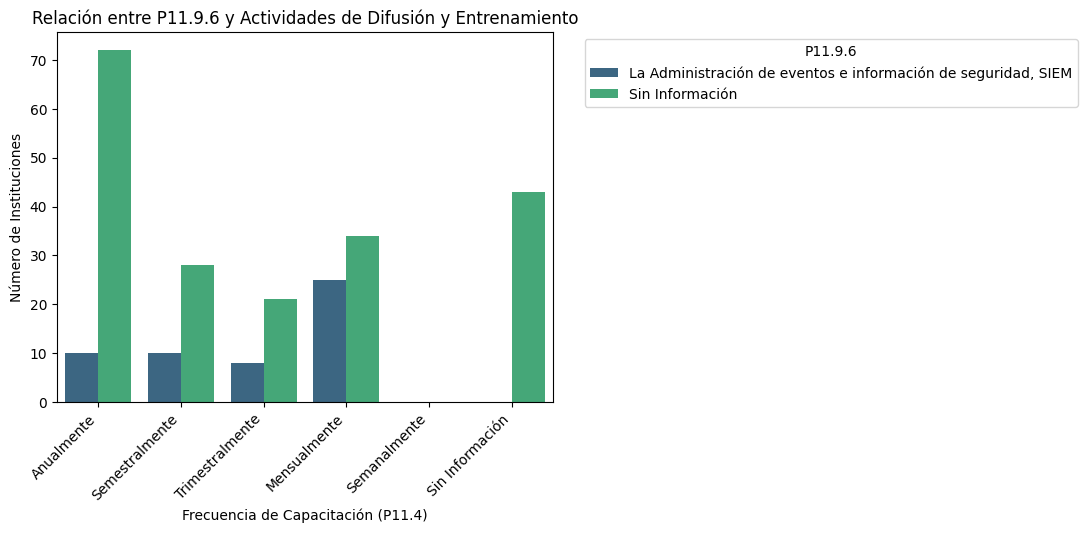

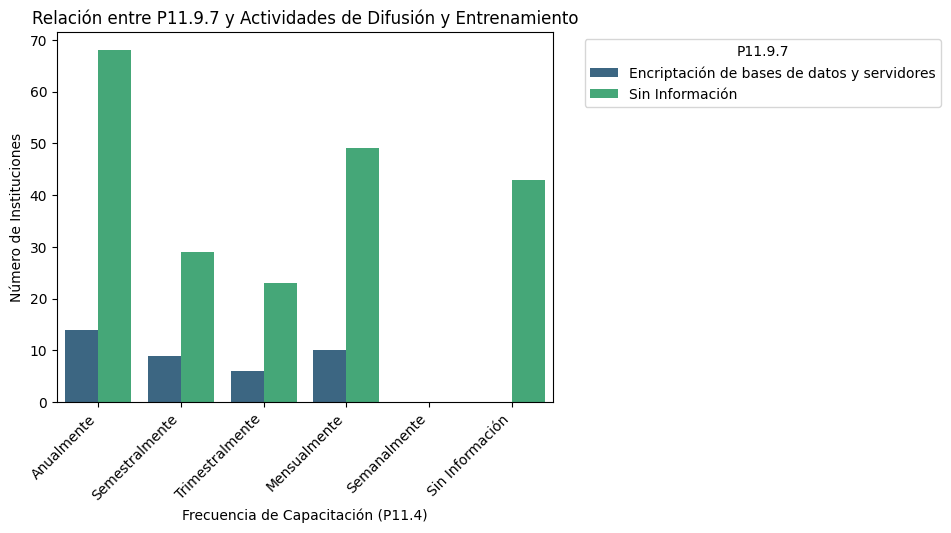

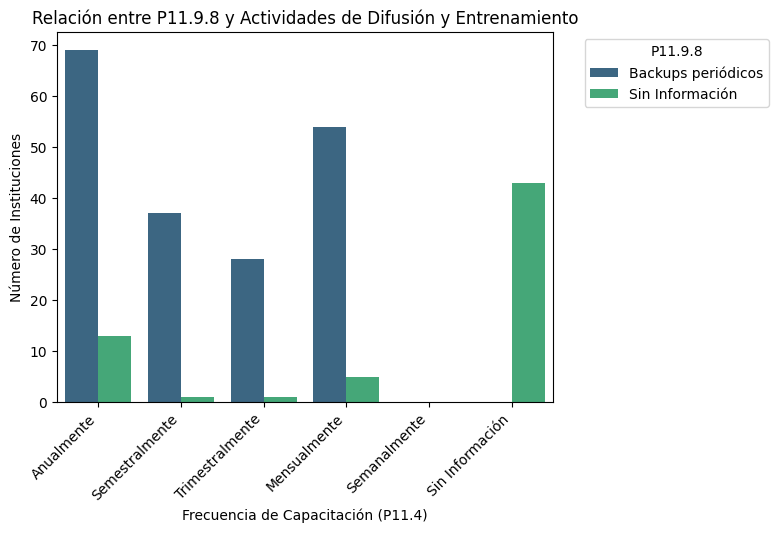

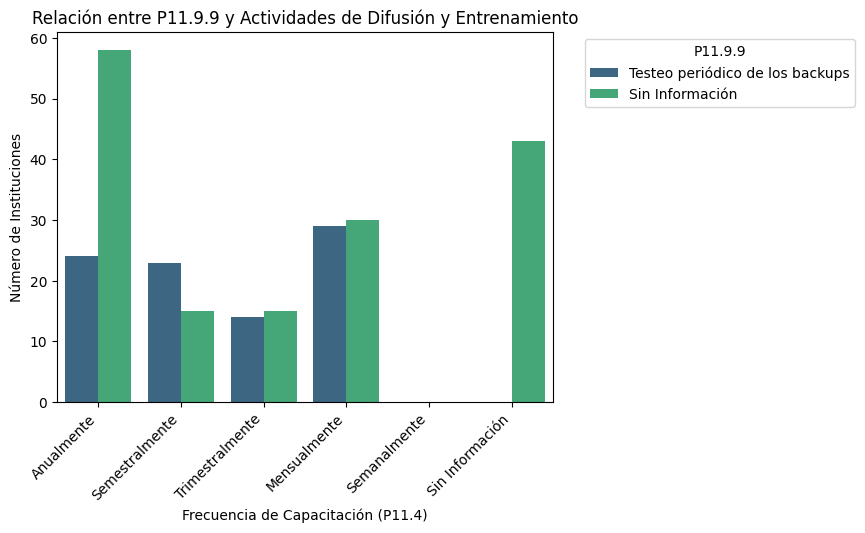

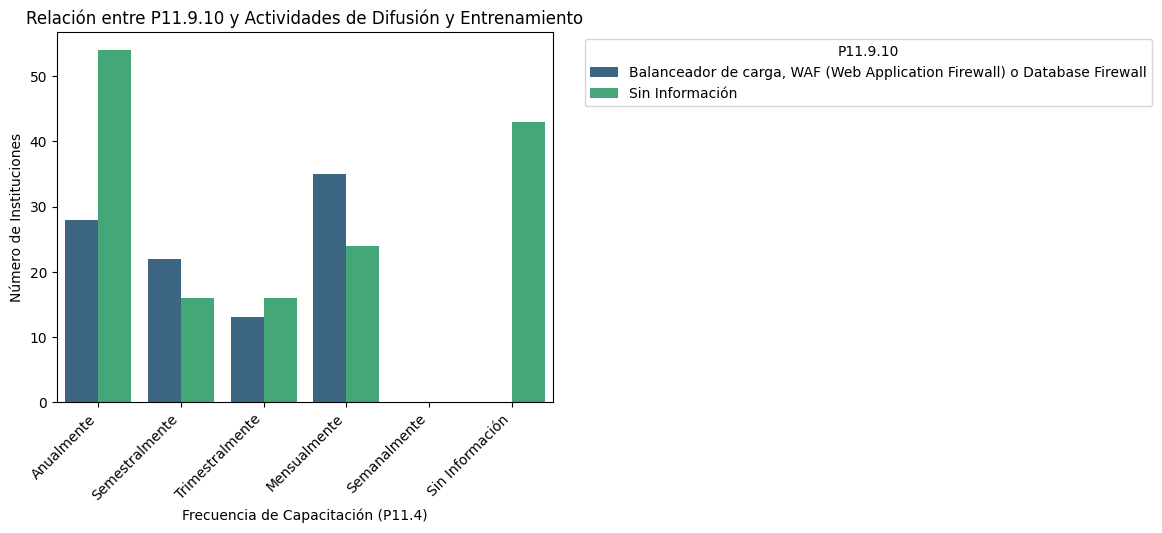

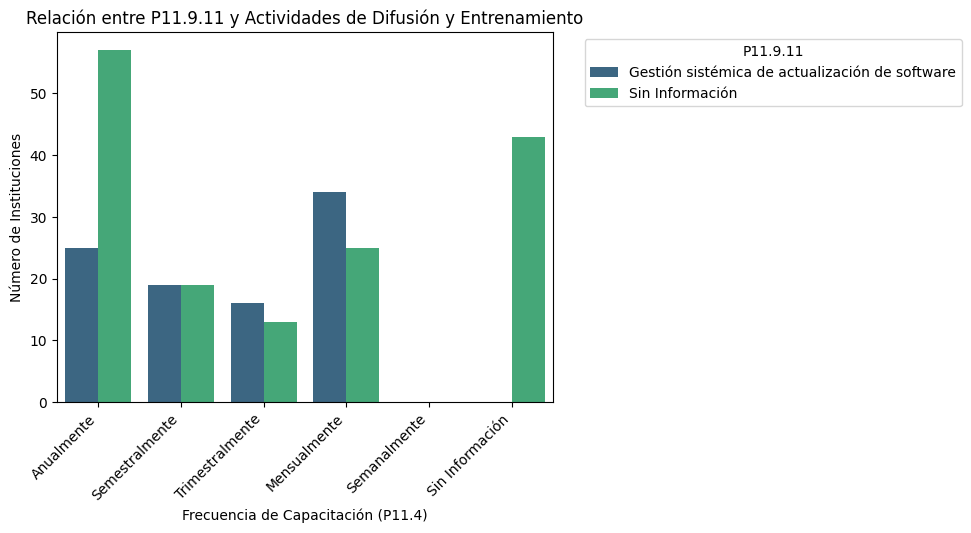

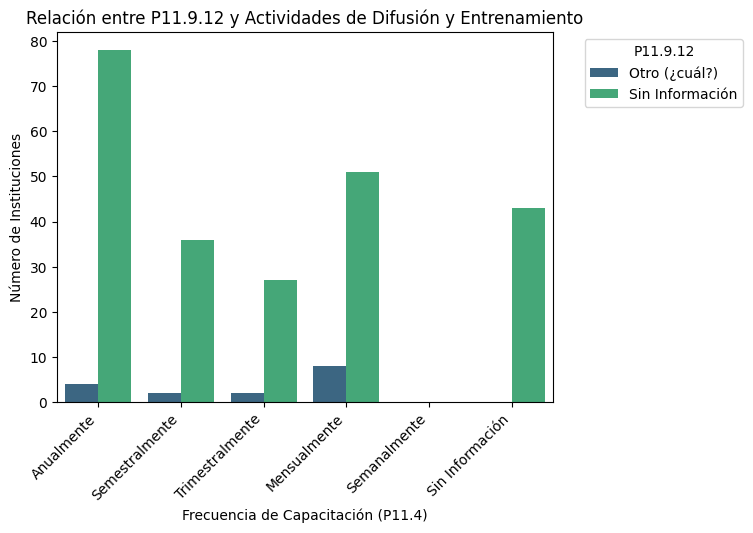

In [117]:
orden_hue = ["Firewall", "Antivirus o EDR (Endpoint Detection and Response)", "Política de complejidad y rotación de contraseñas", "Autenticación de doble factor", "Encriptación de media digital, i.e. discos duros de laptops", "La Administración de eventos e información de seguridad, SIEM", "Encriptación de bases de datos y servidores", "Backups periódicos", "Testeo periódico de los backups", "Balanceador de carga, WAF (Web Application Firewall) o Database Firewall", "Gestión sistémica de actualización de software",'Otro (¿cuál?)', "Sin Información"]
columnas_relacionadas = ["P11.4","P11.9.1","P11.9.2","P11.9.3","P11.9.4","P11.9.5","P11.9.6","P11.9.7","P11.9.8","P11.9.9","P11.9.10","P11.9.11","P11.9.12"]
for i, columna in enumerate(columnas_relacionadas[1:]):
    sns.countplot(x="P11.4", hue=columna, data=MedidasyEntrenamiento, palette='viridis',order=["Anualmente", "Semestralmente", "Trimestralmente", "Mensualmente", "Semanalmente", "Sin Información"],hue_order=[orden_hue[i],"Sin Información"])

    plt.title(f'Relación entre {columna} y Actividades de Difusión y Entrenamiento')
    plt.xlabel('Frecuencia de Capacitación (P11.4)')
    plt.ylabel('Número de Instituciones')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=columna, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()